In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import time
import timeit

## Reference solution and some error functions

In [ ]:
def generate_reference_solution():
  data = {
    'Time': [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5,
             5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5,
             10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5,
             15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20],
    'S': [198.019802, 198.01636, 198.0044105, 197.9807888, 197.941096, 197.8791619, 197.7864062,
          197.6509083, 197.4561469, 197.1792823, 196.788907, 196.242146, 195.4809926, 194.4280278,
          192.9818642, 191.0132649, 188.3638255, 184.8503061, 180.2790401, 174.4745976, 167.3241127,
          158.8306833, 149.1581485, 138.6417623, 127.7473277, 116.9851168, 106.8113835, 97.55661839,
          89.4006011, 82.3886953, 76.4698496, 71.53710065, 67.45989047, 64.10546112, 61.35079061,
          59.08791325, 57.22518947, 55.68654817, 54.40969968, 53.34408205, 52.44892442],
    'E': [1, 0.995453886, 0.998307619, 1.011275379, 1.038131156, 1.084170975, 1.15676163,
          1.266142624, 1.426512702, 1.657514933, 1.986187757, 2.449492843, 3.097534376, 3.997370901,
          5.237177312, 6.930014255, 9.215708622, 12.25830072, 16.23535085, 21.3153444, 27.62135491,
          35.18528663, 43.9060817, 53.53263444, 63.68777838, 73.93210197, 83.84462755, 93.08931092,
          101.4476175, 108.8171771, 115.1887637, 120.6162937, 125.1895235, 129.013429, 132.194589,
          134.8332365, 137.0193388, 138.8311262, 140.3352036, 141.5874335, 142.6341197],
    'I': [0, 0.002932487, 0.006952912, 0.012494922, 0.020159812, 0.03078921, 0.045550691,
          0.066062026, 0.094557518, 0.13411138, 0.188923544, 0.264674761, 0.368949686, 0.511677947,
          0.705495941, 0.965822489, 1.310263879, 1.756817172, 2.320173014, 3.005728156, 3.801768586,
          4.672101826, 5.553417592, 6.362019849, 7.01086558, 7.43172083, 7.59259288, 7.502447628,
          7.203085503, 6.753859262, 6.216570095, 5.645013685, 5.080112292, 4.549320893, 4.06847652,
          3.644563098, 3.278459759, 2.96723488, 2.705859211, 2.488395342, 2.308756903],
    'L': [0, 2.44167E-06, 1.05807E-05, 2.60559E-05, 5.12122E-05, 8.94006E-05, 0.000145336,
          0.000225625, 0.000339478, 0.000499701, 0.000724, 0.001036699, 0.001470977, 0.002071606,
          0.00289812, 0.004028061, 0.005559515, 0.007611379, 0.010318928, 0.01382151, 0.018239415,
          0.023639651, 0.029995968, 0.03715619, 0.044833952, 0.052636292, 0.06012367, 0.06688369,
          0.072592947, 0.077051482, 0.080186375, 0.082032748, 0.082703726, 0.08235916, 0.081178954,
          0.07934335, 0.077020157, 0.074357518, 0.07148106, 0.068493751, 0.065477386]
}

  # Create DataFrame
  df = pd.DataFrame(data)
  return df

def GetReferenceValues():
  df = generate_reference_solution()
  time_true = df['Time'].values.astype(np.float32)
  S_true = df['S'].values
  E_true = df['E'].values
  I_true = df['I'].values
  L_true = df['L'].values
  return S_true, E_true, I_true, L_true
def CalculateMSE(S, E, I, L):
  S_true, E_true, I_true, L_true = GetReferenceValues()
  S_MSE = np.mean((S_true - S)**2)
  E_MSE = np.mean((E_true - E)**2)
  I_MSE = np.mean((I_true - I)**2)
  L_MSE = np.mean((L_true - L)**2)
  return S_MSE, E_MSE, I_MSE, L_MSE

def CalculateMSEDifferentTimes(S, E, I, L, t_sim):
    df = generate_reference_solution()
    t_ref = df['Time'].values.astype(np.float32)
    S_true = df['S'].values
    E_true = df['E'].values
    I_true = df['I'].values
    L_true = df['L'].values

    # For each reference time, find nearest simulation time
    indices = np.searchsorted(t_sim, t_ref, side='left')
    indices = np.clip(indices, 0, len(t_sim)-1)

    # Handle edge cases - check if left or right neighbor is closer
    for i in range(len(indices)):
        if indices[i] > 0:
            left_dist = abs(t_ref[i] - t_sim[indices[i]-1])
            right_dist = abs(t_ref[i] - t_sim[indices[i]])
            if left_dist < right_dist:
                indices[i] -= 1

    S_MSE = np.mean((S_true - S[indices])**2)
    E_MSE = np.mean((E_true - E[indices])**2)
    I_MSE = np.mean((I_true - I[indices])**2)
    L_MSE = np.mean((L_true - L[indices])**2)

    return S_MSE, E_MSE, I_MSE, L_MSE

## Gauss

### Gauss alone

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import time
from google.colab import files
uploaded = files.upload()



#2 point

params = {
    'Lambda': 2.0,
    'beta': 0.025,
    'delta': 1.0,
    'p': 0.3,
    'mu': 0.0101,
    'k': 0.005,
    'r1': 0.0,
    'r2': 0.8182,
    'phi': 0.02,
    'gamma': 0.01,
    'd1': 0.022722,
    'd2': 0.20
    }

# Define the full coupled TB ODE system using parameters and Gauss Quadrature

# Define the TB model ODEs
def TB_ODE_system(t, y):
      # Parameters from the TB model
      # Extract variables from y
    S, E, I, L = y

    # Extract parameters
    Lambda = params['Lambda']
    beta = params['beta']
    delta = params['delta']
    p = params['p']
    mu = params['mu']
    k = params['k']
    r1 = params['r1']
    r2 = params['r2']
    phi = params['phi']
    gamma = params['gamma']
    d1 = params['d1']
    d2 = params['d2']


    dS = Lambda - beta * S * (I + delta * L) - mu * S
    dE = beta * (1 - p) * S * (I + delta * L) + r2 * I - (mu + k * (1 - r1)) * E
    dI = beta * p * S * (I + delta * L) + k * (1 - r1) * E + gamma * L - (mu + d1 + phi * (1 - r2) + r2) * I
    dL = phi * (1 - r2) * I - (mu + d2 + gamma) * L
    return np.array([dS, dE, dI, dL])

# Use 2-point Gauss Quadrature to integrate vector ODE over [a, b]
def gauss_integrate_vector(f, a, b, y):
    x0 = -1 / math.sqrt(3)
    x1 = 1 / math.sqrt(3)
    w0 = w1 = 1
    t0 = (b + a) / 2 + (b - a) / 2 * x0
    t1 = (b + a) / 2 + (b - a) / 2 * x1
    f0 = f(t0, y)
    f1 = f(t1, y)
    return (b - a) / 2 * (w0 * f0 + w1 * f1)

# Time setup and initial condition (Case 2: endemic, small perturbation)
t_start = 0
t_end = 20
dt = 0.5
times = np.arange(t_start, t_end + dt, dt)
y0 = np.array([params['Lambda'] / params['mu'], 1.0, 0.0, 0.0])

# Store results
results = [y0]

start_time=time.time()
# Integrate using Gauss Quadrature
for i in range(1, len(times)):
    t_prev = times[i - 1]
    t_curr = times[i]
    y_prev = results[-1]
    integral = gauss_integrate_vector(TB_ODE_system, t_prev, t_curr, y_prev)
    y_next = y_prev + integral
    results.append(y_next)
end_time=time.time()

# Format and display results
results_array = np.array(results)
df_full = pd.DataFrame({
    'Time': times,
    'S': results_array[:, 0],
    'E': results_array[:, 1],
    'I': results_array[:, 2],
    'L': results_array[:, 3]
})





# Step 1: Load reference solution from Excel
ref_df = pd.read_excel("TB_Model_Output.xlsx", sheet_name="Sheet1")

ref_df.columns = ['Time', 'S', 'E', 'I', 'L']

# Step 2: Merge reference data with Gauss result data
df_plot = pd.merge(df_full, ref_df, on='Time', how='inner')

print("Full TB System Solved with 2-Point Gauss Quadrature", df_full)

print("Execution time: {:.6f} seconds".format(end_time - start_time))


# Step 4: Calculate Mean Squared Error for each compartment
mse_S = np.mean((df_plot['S_x'] - df_plot['S_y']) ** 2)
mse_E = np.mean((df_plot['E_x'] - df_plot['E_y']) ** 2)
mse_I = np.mean((df_plot['I_x'] - df_plot['I_y']) ** 2)
mse_L = np.mean((df_plot['L_x'] - df_plot['L_y']) ** 2)

print("\nMean Squared Errors (MSE) compared to Reference:")
print(f"S (Susceptible): {mse_S:.6f}")
print(f"E (Exposed)    : {mse_E:.6f}")
print(f"I (Infectious) : {mse_I:.6f}")
print(f"L (Latent)     : {mse_L:.6f}")

#df_plot.to_excel(r"C:\Users\sheri\Documents\TB_Model_Comparison.xlsx", index=False)

# Step 3: Create subplots and plot each variable with reference
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)


# S compartment
axs[0, 0].plot(df_full['Time'], df_full['S'], color='tab:blue', linewidth=2, label='S - Gauss 2-Point')
axs[0, 0].plot(ref_df['Time'], ref_df['S'], color='black', linestyle='--', linewidth=1, label='S - Reference')
axs[0, 0].set_ylabel('S (Susceptible)')
axs[0, 0].set_title('TB Model Compartments')
axs[0, 0].grid(True)
axs[0, 0].legend()

# E compartment
axs[0, 1].plot(df_full['Time'], df_full['E'], color='tab:orange', linewidth=2, label='E - Gauss 2-Point')
axs[0, 1].plot(ref_df['Time'], ref_df['E'], color='black', linestyle='--', linewidth=1, label='E - Reference')
axs[0, 1].set_ylabel('E (Exposed)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# I compartment
axs[1, 0].plot(df_full['Time'], df_full['I'], color='tab:red', linewidth=2, label='I - Gauss 2-Point')
axs[1, 0].plot(ref_df['Time'], ref_df['I'], color='black', linestyle='--', linewidth=1, label='I - Reference')
axs[1, 0].set_ylabel('I (Infectious)')
axs[1, 0].set_xlabel('Time (years)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# L compartment
axs[1, 1].plot(df_full['Time'], df_full['L'], color='tab:green', linewidth=2, label='L - Gauss 2-Point')
axs[1, 1].plot(ref_df['Time'], ref_df['L'], color='black', linestyle='--', linewidth=1, label='L - Reference')
axs[1, 1].set_ylabel('L (Latent)')
axs[1, 1].set_xlabel('Time (years)')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### Gauss with Heun

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import time
from google.colab import files
uploaded = files.upload()


# Parameters
params = {
    'Lambda': 2.0,
    'beta': 0.025,
    'delta': 1.0,
    'p': 0.3,
    'mu': 0.0101,
    'k': 0.005,
    'r1': 0.0,
    'r2': 0.8182,
    'phi': 0.02,
    'gamma': 0.01,
    'd1': 0.022722,
    'd2': 0.20
}

# TB ODE system
def TB_ODE_system(t, y):
    S, E, I, L = y
    Lambda = params['Lambda']
    beta = params['beta']
    delta = params['delta']
    p = params['p']
    mu = params['mu']
    k = params['k']
    r1 = params['r1']
    r2 = params['r2']
    phi = params['phi']
    gamma = params['gamma']
    d1 = params['d1']
    d2 = params['d2']

    dS = Lambda - beta * S * (I + delta * L) - mu * S
    dE = beta * (1 - p) * S * (I + delta * L) + r2 * I - (mu + k * (1 - r1)) * E
    dI = beta * p * S * (I + delta * L) + k * (1 - r1) * E + gamma * L - (mu + d1 + phi * (1 - r2) + r2) * I
    dL = phi * (1 - r2) * I - (mu + d2 + gamma) * L
    return np.array([dS, dE, dI, dL])

# Heun's method (RK2) to predict y(ti)
def heun_predict(f, t_n, y_n, t_i, h_heun=0.1):
    numOfSteps = 0
    t = t_n
    y = y_n.copy()
    while t < t_i:
        h = min(h_heun, t_i - t)
        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)
        y += (h / 2) * (k1 + k2)
        t += h
        numOfSteps += 2
    return y, numOfSteps


# 6-point Gauss Quadrature with RK4 estimates
def gauss_integrate_vector_2pt(f, a, b, y_n, h_heun=0.1):
    # 2-point Gauss quadrature nodes and weights
    x = np.array([-0.5773502691896257, 0.5773502691896257])  # nodes
    w = np.array([1.0, 1.0])  # weights

    numSteps = 0
    mid = (a + b) / 2
    half_width = (b - a) / 2

    result = np.zeros_like(y_n)
    for i in range(2):
        t_i = mid + half_width * x[i]
        y_ti, evaluations = heun_predict(f, a, y_n, t_i, h_heun)
        result += w[i] * f(t_i, y_ti)
        numSteps += evaluations

    return half_width * result, numSteps


# Time and initial conditions
t_start = 0
t_end = 20
dt = 0.5          # Main time step for integration
h_rk4 = 0.1      # RK4 internal step for prediction

times = np.arange(t_start, t_end + dt, dt)
y0 = np.array([params['Lambda'] / params['mu'], 1.0, 0.0, 0.0])

# Main integration loop
results = [y0]
totalSteps = 0
def DoCalculations():
  for i in range(1, len(times)):
      t_prev = times[i - 1]
      t_curr = times[i]
      y_prev = results[-1]
      integral, steps = gauss_integrate_vector_2pt(TB_ODE_system, t_prev, t_curr, y_prev, h_rk4)
      global totalSteps
      totalSteps += steps
      y_next = y_prev + integral
      results.append(y_next)
DoCalculations()

# DataFrame
results_array = np.array(results)
df_full = pd.DataFrame({
    'Time': times,
    'S': results_array[:, 0],
    'E': results_array[:, 1],
    'I': results_array[:, 2],
    'L': results_array[:, 3]
})

# Output as table
#print("\nFull TB System Solved with Heun-enhanced 2-Point Gauss Quadrature")
#print(df_full.to_string(index=False))
print("Steps done:", totalSteps)


ref_df = generate_reference_solution()


df_plot = pd.merge(df_full, ref_df, on='Time', how='inner')

# Calculate Mean Squared Error for each compartment
mse_S, mse_E, mse_I, mse_L = CalculateMSE(df_full["S"], df_full["E"], df_full["I"], df_full["L"])

print("\nMean Squared Errors (MSE) compared to Reference:")
print(f"S (Susceptible): {mse_S:.6f}")
print(f"E (Exposed)    : {mse_E:.6f}")
print(f"I (Infectious) : {mse_I:.6f}")
print(f"L (Latent)     : {mse_L:.6f}")


fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)


# S compartment
axs[0, 0].plot(df_full['Time'], df_full['S'], color='tab:blue', linewidth=2, label='S - Gauss 2-Point')
axs[0, 0].plot(ref_df['Time'], ref_df['S'], color='black', linestyle='--', linewidth=1, label='S - Reference')
axs[0, 0].set_ylabel('S (Susceptible)')
axs[0, 0].set_title('TB Model Compartments')
axs[0, 0].grid(True)
axs[0, 0].legend()

# E compartment
axs[0, 1].plot(df_full['Time'], df_full['E'], color='tab:orange', linewidth=2, label='E - Gauss 2-Point')
axs[0, 1].plot(ref_df['Time'], ref_df['E'], color='black', linestyle='--', linewidth=1, label='E - Reference')
axs[0, 1].set_ylabel('E (Exposed)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# I compartment
axs[1, 0].plot(df_full['Time'], df_full['I'], color='tab:red', linewidth=2, label='I - Gauss 2-Point')
axs[1, 0].plot(ref_df['Time'], ref_df['I'], color='black', linestyle='--', linewidth=1, label='I - Reference')
axs[1, 0].set_ylabel('I (Infectious)')
axs[1, 0].set_xlabel('Time (years)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# L compartment
axs[1, 1].plot(df_full['Time'], df_full['L'], color='tab:green', linewidth=2, label='L - Gauss 2-Point')
axs[1, 1].plot(ref_df['Time'], ref_df['L'], color='black', linestyle='--', linewidth=1, label='L - Reference')
axs[1, 1].set_ylabel('L (Latent)')
axs[1, 1].set_xlabel('Time (years)')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()
timesElapsed = timeit.repeat(
    lambda: DoCalculations(),
    repeat=1000,      # Run 10 separate trials
    number=1        # Each trial runs once (adjust for very fast functions)
)
timesElapsed = sorted(timesElapsed)
print('min Time', min(timesElapsed))
print('median Time', np.median(timesElapsed))
print('mean Time', np.mean(timesElapsed))
print('std Time', np.std(timesElapsed))

## Romberg Integration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -------------------------
# TB Model Parameters
# -------------------------
params = {
    'Λ': 2.0,         # Recruitment rate
    'β': 0.025,       # Transmission rate
    'δ': 1.0,         # Infectivity of latent individuals
    'p': 0.3,         # Proportion progressing directly to infectious
    'μ': 0.0101,      # Natural death rate
    'k': 0.005,       # Progression rate from E to I
    'r₁': 0.0,        # Recovery from E (none here)
    'r₂': 0.8182,     # Recovery from I
    'φ': 0.02,        # Progression from I to L
    'γ': 0.01,        # Reactivation from L to I
    'd₁': 0.0227,     # TB death from I
    'd₂': 0.20        # TB death from L
}

# -------------------------
# Time discretization
# -------------------------
t0, t_end = 0.0, 20.0  # Time in years
N_steps = 40           # Number of time steps
ts = np.linspace(t0, t_end, N_steps + 1)
dt = ts[1] - ts[0]     # Time step size

# -------------------------
# Derivatives function
# -------------------------
def derivatives(t, y):
    """Compute the derivatives for all compartments"""
    s, e, i, l = y
    dS = params['Λ'] - params['β']*s*(i + params['δ']*l) - params['μ']*s
    dE = params['β']*(1 - params['p'])*s*(i + params['δ']*l) + params['r₂']*i - (params['μ'] + params['k']*(1 - params['r₁']))*e
    dI = params['β']*params['p']*s*(i + params['δ']*l) + params['k']*(1 - params['r₁'])*e + params['γ']*l - (params['μ'] + params['d₁'] + params['φ']*(1 - params['r₂']) + params['r₂'])*i
    dL = params['φ']*(1 - params['r₂'])*i - (params['μ'] + params['d₂'] + params['γ'])*l
    return np.array([dS, dE, dI, dL])

# -------------------------
# Romberg Integration
# -------------------------
def romberg_integrate(f, a, b, max_steps=5, tol=1e-6):
    """Romberg integration with adaptive error control"""
    table = np.zeros((max_steps, max_steps))
    h = b - a
    table[0, 0] = 0.5 * h * (f(a) + f(b))

    for i in range(1, max_steps):
        h /= 2
        total = sum(f(a + k*h) for k in range(1, 2**i, 2))
        table[i, 0] = 0.5 * table[i-1, 0] + h * total

        for j in range(1, i+1):
            table[i, j] = table[i, j-1] + (table[i, j-1] - table[i-1, j-1]) / (4**j - 1)

        if abs(table[i, i] - table[i-1, i-1]) < tol:
            break

    return table[i, i], i  # return integral and level of convergence

# -------------------------
# Solve TB Model Function
# -------------------------
def solve_tb_model(E0):
    """Solve the TB model using Romberg integration with error tracking"""
    S = np.zeros(N_steps + 1)
    E = np.zeros_like(S)
    I = np.zeros_like(S)
    L = np.zeros_like(S)

    S[0] = params['Λ'] / params['μ']  # Initial susceptible
    E[0] = E0
    I[0] = 0
    L[0] = 0

    errors = {'S': [], 'E': [], 'I': [], 'L': []}
    deriv_history = []

    for step in range(N_steps):
        t_a, t_b = ts[step], ts[step + 1]
        current_derivs = derivatives(t_a, [S[step], E[step], I[step], L[step]])
        deriv_history.append(current_derivs)

        # Linear interpolation for integrand functions
        def make_integrand(comp_index):
            def integrand(t):
                theta = (t - t_a) / dt
                s = S[step] * (1 - theta) + S[step] * theta
                e = E[step] * (1 - theta) + E[step] * theta
                i = I[step] * (1 - theta) + I[step] * theta
                l = L[step] * (1 - theta) + L[step] * theta
                return derivatives(t, [s, e, i, l])[comp_index]
            return integrand

        components = [S, E, I, L]
        names = ['S', 'E', 'I', 'L']

        for i, (var, name) in enumerate(zip(components, names)):
            integral, level = romberg_integrate(make_integrand(i), t_a, t_b)
            var[step + 1] = var[step] + integral

            # Estimate error using last few derivative magnitudes
            if len(deriv_history) > 2:
                deriv_scale = np.mean([abs(d[i]) for d in deriv_history[-3:]])
            else:
                deriv_scale = abs(current_derivs[i])

            error = (dt**5 / 2880) * deriv_scale / (4**level)
            errors[name].append(error)

    return S, E, I, L, errors

# -------------------------
# Calculate Relative Errors
# -------------------------
def calculate_relative_errors(approx, ref):
    """Calculate relative errors safely"""
    with np.errstate(divide='ignore', invalid='ignore'):
        rel_error = np.abs(approx - ref) / np.where(np.abs(ref) > 0, np.abs(ref), 1)
    return np.nan_to_num(rel_error, nan=0.0)

def calculate_relative_error(true, approx):
  if(true == 0):
    return -1
  return abs(true - approx) / true

# -------------------------
# Run both scenarios
# -------------------------
print("Running TB model simulations...")
S0, E0, I0, L0, _ = solve_tb_model(E0=0)  # Disease-free
S1, E1, I1, L1, romberg_errors = solve_tb_model(E0=1)  # Endemic

ref_S, ref_E, ref_I, ref_L = generate_reference_solution()

# Calculate comparison errors
comp_errors_S = [calculate_relative_error(ref_S[i], S1[i]) for i in range(len(ref_S))]
comp_errors_E = [calculate_relative_error(ref_E[i], E1[i]) for i in range(len(ref_E))]
comp_errors_I = [calculate_relative_error(ref_I[i], I1[i]) for i in range(len(ref_I))]
comp_errors_L = [calculate_relative_error(ref_L[i], L1[i]) for i in range(len(ref_L))]

# -------------------------
# Prepare Theoretical Errors for each time point
# -------------------------
# Theoretical errors are calculated for each integration step (40 steps)
# We'll create arrays with 41 values (same length as ts) for plotting
# For t=0, we set theoretical error to 0
theo_err_S = np.zeros(len(ts))
theo_err_E = np.zeros(len(ts))
theo_err_I = np.zeros(len(ts))
theo_err_L = np.zeros(len(ts))

# Fill the arrays (the error at step i is associated with the value at i+1)
theo_err_S[1:] = romberg_errors['S']
theo_err_E[1:] = romberg_errors['E']
theo_err_I[1:] = romberg_errors['I']
theo_err_L[1:] = romberg_errors['L']

# Calculate relative errors in percentage
rel_err_S = comp_errors_S * 100
rel_err_E = comp_errors_E * 100
rel_err_I = comp_errors_I * 100
rel_err_L = comp_errors_L * 100

# -------------------------
# Print Error Comparison Table
# -------------------------
print("\n" + "="*100)
print("Error Analysis Summary for Tuberculosis Model (E(0)=1)")
print("="*100)
print(f"{'Variable':<10} {'Avg Theoretical Error':<25} {'Max Relative Error (%)':<25}")
print("-"*100)
print(f"{'S':<10} {np.mean(theo_err_S):<25.4e} {np.max(rel_err_S):<25.6f}")
print(f"{'E':<10} {np.mean(theo_err_E):<25.4e} {np.max(rel_err_E):<25.6f}")
print(f"{'I':<10} {np.mean(theo_err_I):<25.4e} {np.max(rel_err_I):<25.6f}")
print(f"{'L':<10} {np.mean(theo_err_L):<25.4e} {np.max(rel_err_L):<25.6f}")
print("="*100)

# -------------------------
# Print Complete Time Series Table (41 values)
# -------------------------
print("\n\n" + "="*150)
print("Complete Time Series Values for TB Model (E(0)=1)")
print("="*150)
#print(f"{'Time':<8} {'S(t)':<10} {'TheoErrS':<10} {'E(t)':<10} {'TheoErrE':<10} "
 #     f"{'I(t)':<12} {'TheoErrI':<12} {'L(t)':<12} {'TheoErrL':<12} "
  #    f"{'RelErrS(%)':<12} {'RelErrE(%)':<12} {'RelErrI(%)':<12} {'RelErrL(%)':<12}")
print(f"{'Time':<8} {'S(t)':<10} {'S ref':<10} {'E(t)':<10} {'E ref':<10} "
      f"{'I(t)':<12} {'I ref':<12} {'L(t)':<12} {'L ref':<12} "
      f"{'RelErrS(%)':<12} {'RelErrE(%)':<12} {'RelErrI(%)':<12} {'RelErrL(%)':<12}")
print("-"*150)

# Print all 41 values (from t=0 to t=20)
for i in range(len(ts)):
    print(f"{ts[i]:<8.1f} "
          f"{S1[i]:<10.4f} {ref_S[i]:<10.2e} "
          f"{E1[i]:<10.4f} {ref_E[i]:<10.2e} "
          f"{I1[i]:<12.6f} {ref_I[i]:<12.2e} "
          f"{L1[i]:<12.6f} {ref_L[i]:<12.2e} "
          f"{rel_err_S[i]:<12.6f} {rel_err_E[i]:<12.6f} "
          f"{rel_err_I[i]:<12.6f} {rel_err_L[i]:<12.6f}")

# -------------------------
# Plot Results
# -------------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Tuberculosis Model Dynamics (E(0)=1)', fontsize=16)

axs[0,0].plot(ts, S1, 'b-', label='Romberg Solution')
axs[0,0].plot(ts, ref_S, 'r--', label='Reference Solution')
axs[0,0].set_title('Susceptible (S)')
axs[0,0].set_ylabel('Population')
axs[0,0].legend()
axs[0,0].grid(True)

axs[0,1].plot(ts, E1, 'g-', label='Romberg Solution')
axs[0,1].plot(ts, ref_E, 'r--', label='Reference Solution')
axs[0,1].set_title('Exposed (E)')
axs[0,1].legend()
axs[0,1].grid(True)

axs[1,0].plot(ts, I1, 'r-', label='Romberg Solution')
axs[1,0].plot(ts, ref_I, 'b--', label='Reference Solution')
axs[1,0].set_title('Infectious (I)')
axs[1,0].set_xlabel('Time (years)')
axs[1,0].set_ylabel('Population')
axs[1,0].legend()
axs[1,0].grid(True)

axs[1,1].plot(ts, L1, 'm-', label='Romberg Solution')
axs[1,1].plot(ts, ref_L, 'b--', label='Reference Solution')
axs[1,1].set_title('Lost to follow-up (L)')
axs[1,1].set_xlabel('Time (years)')
axs[1,1].legend()
axs[1,1].grid(True)

plt.tight_layout()
plt.savefig("tb_model_results.png", dpi=300)
plt.show()


## Non-self start method (Modified-Euler)


📈 Total ODE function calls: 79
⏱️ Execution Time: 1.133204 ms



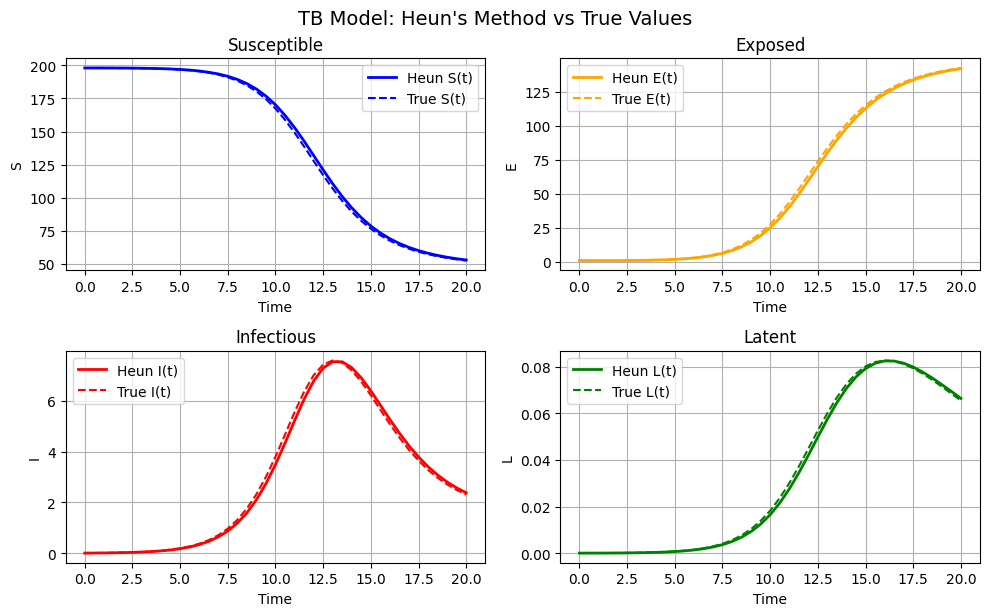


Mean Squared Errors (MSE) compared to Reference:
S (Susceptible): 3.687817
E (Exposed)    : 3.394948
I (Infectious) : 0.022697
L (Latent)     : 0.000002
min Time 0.0009209870000006504
median Time 0.001023261000000275
mean Time 0.0012912860399995907
std Time 0.0009243712152021504


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# === Load true values from Excel ===
real_data = generate_reference_solution()
t_real = real_data["Time"]
S_real = real_data["S"]
E_real = real_data["E"]
I_real = real_data["I"]
L_real = real_data["L"]

# === Parameters (from R code) ===
params = {
    'lambda_': 2,
    'beta': 0.025,
    'delta': 1,
    'p': 0.3,
    'mu': 0.0101,
    'k': 0.005,
    'r1': 0,
    'r2': 0.8182,
    'phi': 0.02,
    'gamma': 0.01,
    'd1': 0.0227,
    'd2': 0.20
}

# === ODE function ===
ode_call_count = 0

def tb_model(t, y, p):
    global ode_call_count
    ode_call_count += 1

    S, E, I, L = y
    λ = p['lambda_']
    β = p['beta']
    δ = p['delta']
    μ = p['mu']
    k = p['k']
    r1 = p['r1']
    r2 = p['r2']
    φ = p['phi']
    γ = p['gamma']
    d1 = p['d1']
    d2 = p['d2']
    p_val = p['p']

    dS = λ - β * S * (I + δ * L) - μ * S
    dE = β * (1 - p_val) * S * (I + δ * L) + r2 * I - (μ + k * (1 - r1)) * E
    dI = β * p_val * S * (I + δ * L) + k * (1 - r1) * E + γ * L - (μ + d1 + φ * (1 - r2) + r2) * I
    dL = φ * (1 - r2) * I - (μ + d2 + γ) * L

    return np.array([dS, dE, dI, dL])

# === Heun Non-Self-Starting Method ===
def heun_non_self_start(f, y0, t, p):
    N = len(t)
    y = np.zeros((N, len(y0)))
    y[0] = y0
    y[1] = y[0] + (t[1] - t[0]) * f(t[0], y[0], p)

    for n in range(1, N - 1):
        h = t[n+1] - t[n]
        fn = f(t[n], y[n], p)
        y_predict = y[n] + h * fn
        f_predict = f(t[n+1], y_predict, p)
        y[n+1] = y[n] + (h / 2) * (fn + f_predict)

    return y

# === Initial Conditions ===
y0 = [params['lambda_'] / params['mu'], 1, 0, 0]  # epidemic case
t = np.linspace(0, 20, 41)

# === Solve the system ===
start_time = time.time()
solution_heun = heun_non_self_start(tb_model, y0, t, params)
end_time = time.time()

execution_time = (end_time - start_time) * 1000  # in ms
S_heun, E_heun, I_heun, L_heun = solution_heun.T

# === Print results ===
print(f"\n📈 Total ODE function calls: {ode_call_count}")
print(f"⏱️ Execution Time: {execution_time:.6f} ms\n")

# === Plotting with true values ===
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(t, S_heun, 'b', linewidth=2, label='Heun S(t)')
plt.plot(t_real, S_real, 'b--', label='True S(t)')
plt.title("Susceptible"); plt.xlabel("Time"); plt.ylabel("S")
plt.grid(True); plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, E_heun, 'orange', linewidth=2, label='Heun E(t)')
plt.plot(t_real, E_real, 'orange', linestyle='--', label='True E(t)')
plt.title("Exposed"); plt.xlabel("Time"); plt.ylabel("E")
plt.grid(True); plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, I_heun, 'r', linewidth=2, label='Heun I(t)')
plt.plot(t_real, I_real, 'r--', label='True I(t)')
plt.title("Infectious"); plt.xlabel("Time"); plt.ylabel("I")
plt.grid(True); plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, L_heun, 'green', linewidth=2, label='Heun L(t)')
plt.plot(t_real, L_real, 'green', linestyle='--', label='True L(t)')
plt.title("Latent"); plt.xlabel("Time"); plt.ylabel("L")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.suptitle("TB Model: Heun's Method vs True Values", fontsize=14, y=1.02)
plt.show()

mse_S, mse_E, mse_I, mse_L = CalculateMSE(S_heun, E_heun, I_heun, L_heun)

print("\nMean Squared Errors (MSE) compared to Reference:")
print(f"S (Susceptible): {mse_S:.6f}")
print(f"E (Exposed)    : {mse_E:.6f}")
print(f"I (Infectious) : {mse_I:.6f}")
print(f"L (Latent)     : {mse_L:.6f}")

timesElapsed = timeit.repeat(
    lambda: heun_non_self_start(tb_model, y0, t, params),
    repeat=50,      # Run 10 separate trials
    number=1        # Each trial runs once (adjust for very fast functions)
)
timesElapsed = sorted(timesElapsed)
print('min Time', min(timesElapsed))
print('median Time', np.median(timesElapsed))
print('mean Time', np.mean(timesElapsed))
print('std Time', np.std(timesElapsed))

## Runge-Kutta-Method

Steps done: 160

Mean Squared Errors (MSE) compared to Reference:
S (Susceptible): 0.000129
E (Exposed)    : 0.000120
I (Infectious) : 0.000001
L (Latent)     : 0.000000


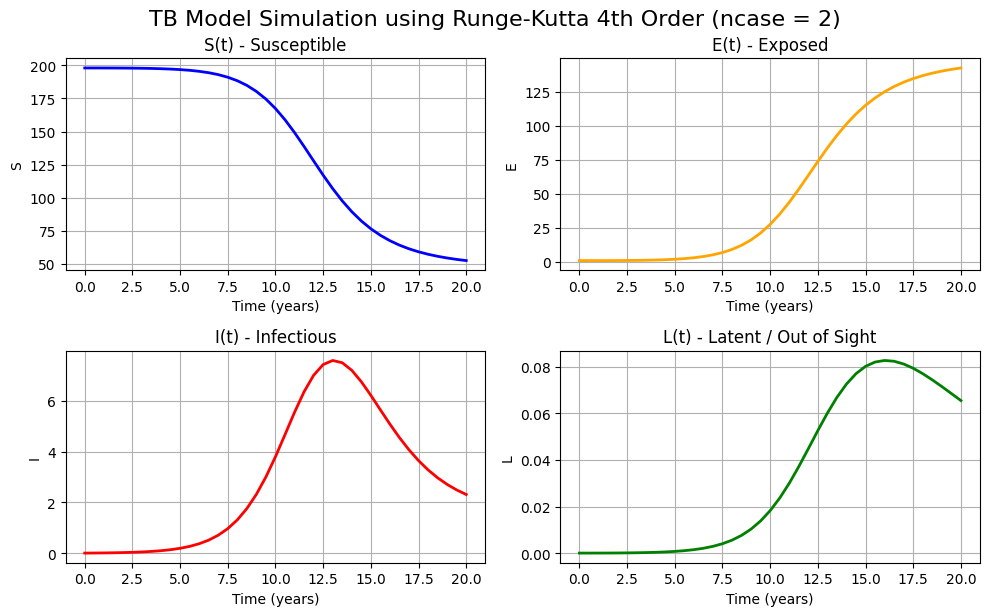

min Time 0.0011222800000041389
median Time 0.0011592755000009447
mean Time 0.001212772814000047
std Time 0.0002971947725447371


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

params = [
    2,         # lambda (recruitment rate)
    0.025,     # beta (transmission rate)
    1,         # delta (differential infectivity)
    0.3,       # p (fraction that goes directly to infectious)
    0.0101,    # mu (natural death rate)
    0.005,     # k (progression rate from exposed to infectious)
    0,         # r1 (early treatment effectiveness, not used here)
    0.8182,    # r2 (treatment rate of infectious)
    0.02,      # phi (rate from I to L)
    0.01,      # gamma (reactivation from L to I)
    0.0227,    # d1 (death rate from I)
    0.20       # d2 (death rate from L)
]


def tb_derivatives(t, y, params):
    S, E, I, L = y
    λ, β, δ, p, μ, k, r1, r2, φ, γ, d1, d2 = params

    dSdt = λ - β * S * (I + δ * L) - μ * S
    dEdt = β * (1 - p) * S * (I + δ * L) + r2 * I - (μ + k * (1 - r1)) * E
    dIdt = β * p * S * (I + δ * L) + k * (1 - r1) * E + γ * L - (μ + d1 + φ * (1 - r2) + r2) * I
    dLdt = φ * (1 - r2) * I - (μ + d2 + γ) * L

    return np.array([dSdt, dEdt, dIdt, dLdt])

def runge_kutta_4(f, y0, t, params):
    steps = 0
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        h = t[i] - t[i - 1]
        k1 = f(t[i - 1], y[i - 1], params)
        k2 = f(t[i - 1] + h/2, y[i - 1] + h/2 * k1, params)
        k3 = f(t[i - 1] + h/2, y[i - 1] + h/2 * k2, params)
        k4 = f(t[i - 1] + h, y[i - 1] + h * k3, params)
        y[i] = y[i - 1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        steps += 4
    return y, steps

ncase = 2

if ncase == 1:
    S0 = 2 / 0.0101
    E0 = 0
    I0 = 0
    L0 = 0
elif ncase == 2:
    S0 = 2 / 0.0101     # ≈ 198.02
    E0 = 1              # Introduce 1 exposed person
    I0 = 0
    L0 = 0

y0 = [S0, E0, I0, L0]

t = np.linspace(0, 20, 41)
solution, totalSteps = runge_kutta_4(tb_derivatives, y0, t, params)
S_rk, E_rk, I_rk, L_rk = solution.T

df = pd.DataFrame({
    "Time (years)": t,
    "Susceptible S(t)": S_rk,
    "Exposed E(t)": E_rk,
    "Infectious I(t)": I_rk,
    "Latent L(t)": L_rk
})

#print(df.to_string(index=False))
print("Steps done:", totalSteps)
mse_S, mse_E, mse_I, mse_L = CalculateMSE(df["Susceptible S(t)"], df["Exposed E(t)"], df["Infectious I(t)"], df["Latent L(t)"])

print("\nMean Squared Errors (MSE) compared to Reference:")
print(f"S (Susceptible): {mse_S:.6f}")
print(f"E (Exposed)    : {mse_E:.6f}")
print(f"I (Infectious) : {mse_I:.6f}")
print(f"L (Latent)     : {mse_L:.6f}")

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(t, S_rk, 'b', linewidth=2)
plt.title('S(t) - Susceptible')
plt.xlabel('Time (years)')
plt.ylabel('S')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, E_rk, 'orange', linewidth=2)
plt.title('E(t) - Exposed')
plt.xlabel('Time (years)')
plt.ylabel('E')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t, I_rk, 'r', linewidth=2)
plt.title('I(t) - Infectious')
plt.xlabel('Time (years)')
plt.ylabel('I')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t, L_rk, 'green', linewidth=2)
plt.title('L(t) - Latent / Out of Sight')
plt.xlabel('Time (years)')
plt.ylabel('L')
plt.grid(True)

plt.tight_layout()
plt.suptitle('TB Model Simulation using Runge-Kutta 4th Order (ncase = {})'.format(ncase), fontsize=16, y=1.02)
plt.show()

timesElapsed = timeit.repeat(
    lambda: runge_kutta_4(tb_derivatives, y0, t, params),
    repeat=1000,      # Run 10 separate trials
    number=1        # Each trial runs once (adjust for very fast functions)
)
timesElapsed = sorted(timesElapsed)
print('min Time', min(timesElapsed))
print('median Time', np.median(timesElapsed))
print('mean Time', np.mean(timesElapsed))
print('std Time', np.std(timesElapsed))

2 ierations of the runge-kutta **method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


S0 = 2 / 0.0101
E0 = 1
I0 = 0
L0 = 0

y0 = [S0, E0, I0, L0]

t = np.linspace(0, 20, 41)


y0 = np.array([S0, E0, I0, L0])
t = np.linspace(0, 20, 41)
h = t[1] - t[0]

print(f"Initial Conditions:\nS0 = {S0}, E0 = {E0}, I0 = {I0}, L0 = {L0}\n")
print(f"Time Step (h) = {h}\n")

print("Iteration 1 (from t = 0 to t = {:.2f})".format(t[1]))
k1 = tb_derivatives(t[0], y0, params)
k2 = tb_derivatives(t[0] + h/2, y0 + h/2 * k1, params)
k3 = tb_derivatives(t[0] + h/2, y0 + h/2 * k2, params)
k4 = tb_derivatives(t[0] + h, y0 + h * k3, params)

print("k1 =", k1)
print("k2 =", k2)
print("k3 =", k3)
print("k4 =", k4)

y1 = y0 + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
print("y1 =", y1, "\n")

print("Iteration 2 (from t = {:.2f} to t = {:.2f})".format(t[1], t[2]))
k1 = tb_derivatives(t[1], y1, params)
k2 = tb_derivatives(t[1] + h/2, y1 + h/2 * k1, params)
k3 = tb_derivatives(t[1] + h/2, y1 + h/2 * k2, params)
k4 = tb_derivatives(t[1] + h, y1 + h * k3, params)

print("k1 =", k1)
print("k2 =", k2)
print("k3 =", k3)
print("k4 =", k4)

y2 = y1 + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
print("y2 =", y2)


print("\nk1 for S, E, I, L =", k1)
print("S1 =", y1[0])
print("E1 =", y1[1])
print("I1 =", y1[2])
print("L1 =", y1[3])



**ERRORS CALCULATIONS:**

In [ ]:
import pandas as pd
import numpy as np


file_path = r"/content/TB_Model_RK4_ERRORS (1).xlsx"
df = pd.read_excel(file_path)

S_ref = df["Susceptible S(t)"].values
S_rk4 = df["Susceptible (R-K)"].values
E_ref = df["Exposed E(t)"].values
E_rk4 = df["Exposed  (R-K)"].values
I_ref = df["Infectious I(t)"].values
I_rk4 = df["Infectious  (R-K)"].values
L_ref = df["Latent L(t)"].values
L_rk4 = df["Latent  (R-K)"].values


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_S = mse(S_ref, S_rk4)
mse_E = mse(E_ref, E_rk4)
mse_I = mse(I_ref, I_rk4)
mse_L = mse(L_ref, L_rk4)
avg_mse = np.mean([mse_S, mse_E, mse_I, mse_L])

print(" Mean Squared Error Results:")
print(f" MSE for Susceptible S(t): {mse_S:.8f}")
print(f" MSE for Exposed     E(t): {mse_E:.8f}")
print(f" MSE for Infectious  I(t): {mse_I:.8f}")
print(f" MSE for Latent      L(t): {mse_L:.8f}")
print(f"\nAverage MSE across all compartments: {avg_mse:.8f}")
print("\n Preview of Excel Data:")
df.head(42)


FileNotFoundError: [Errno 2] No such file or directory: '/content/TB_Model_RK4_ERRORS (1).xlsx'

**RUNGE-KUTTA VALUES vs REFERENCE VALUES:**

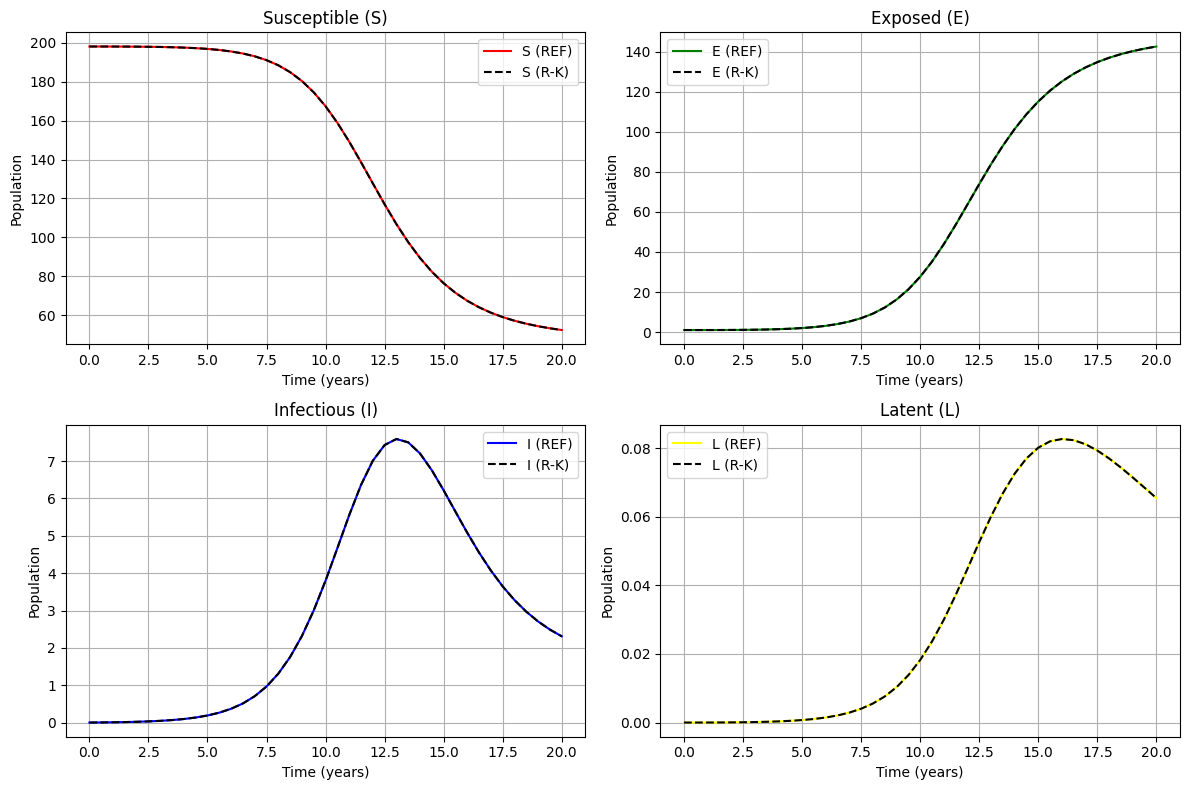

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the Excel file
t_real = real_data["Time"]
S_real = real_data["S"]
E_real = real_data["E"]
I_real = real_data["I"]
L_real = real_data["L"]

# Plotting
plt.figure(figsize=(12, 8))

# Susceptible (S)
plt.subplot(2, 2, 1)
plt.plot(time, S_rk, label='S (REF)', color='red')
plt.plot(time, S_real, label='S (R-K)', linestyle='--', color='black')
plt.title('Susceptible (S)')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend()
plt.grid()

# Exposed (E)
plt.subplot(2, 2, 2)
plt.plot(time, E_rk, label='E (REF)', color='green')
plt.plot(time, E_real, label='E (R-K)', linestyle='--', color='black')
plt.title('Exposed (E)')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend()
plt.grid()

# Infectious (I)
plt.subplot(2, 2, 3)
plt.plot(time, I_rk, label='I (REF)', color='blue')
plt.plot(time, I_real, label='I (R-K)', linestyle='--', color='black')
plt.title('Infectious (I)')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend()
plt.grid()

# Latent (L)
plt.subplot(2, 2, 4)
plt.plot(time, L_rk, label='L (REF)', color='yellow')
plt.plot(time, L_real, label='L (R-K)', linestyle='--', color='black')
plt.title('Latent (L)')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


**Time Analysis for Runge-Kutta method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit

# --- TB Model Parameters ---
params = [
    2,         # lambda
    0.025,     # beta
    1,         # delta
    0.3,       # p
    0.0101,    # mu
    0.005,     # k
    0,         # r1
    0.8182,    # r2
    0.02,      # phi
    0.01,      # gamma
    0.0227,    # d1
    0.20       # d2
]

# --- Derivatives Function ---
def tb_derivatives(t, y, params):
    S, E, I, L = y
    λ, β, δ, p, μ, k, r1, r2, φ, γ, d1, d2 = params
    dSdt = λ - β * S * (I + δ * L) - μ * S
    dEdt = β * (1 - p) * S * (I + δ * L) + r2 * I - (μ + k * (1 - r1)) * E
    dIdt = β * p * S * (I + δ * L) + k * (1 - r1) * E + γ * L - (μ + d1 + φ * (1 - r2) + r2) * I
    dLdt = φ * (1 - r2) * I - (μ + d2 + γ) * L
    return np.array([dSdt, dEdt, dIdt, dLdt])

# --- RK4 Solver ---
def runge_kutta_4(f, y0, t, params):
    steps = 0
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        h = t[i] - t[i - 1]
        k1 = f(t[i - 1], y[i - 1], params)
        k2 = f(t[i - 1] + h/2, y[i - 1] + h/2 * k1, params)
        k3 = f(t[i - 1] + h/2, y[i - 1] + h/2 * k2, params)
        k4 = f(t[i - 1] + h, y[i - 1] + h * k3, params)
        y[i] = y[i - 1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        steps += 4
    return y, steps

# --- Initial Conditions ---
S0 = 2 / 0.0101     # ~198.02
E0 = 1
I0 = 0
L0 = 0
y0 = [S0, E0, I0, L0]
t = np.linspace(0, 20, 41)

# --- Time Analysis ---
timesElapsed = timeit.repeat(
    lambda: runge_kutta_4(tb_derivatives, y0, t, params),
    repeat=1000,  # Number of measurements
    number=1      # Each one runs the RK4 method once
)

# --- Stats Output ---
print(f"\nTime Analysis over 1000 RK4 runs:")
print(f"Minimum Time: {min(timesElapsed):.6e} seconds")
print(f"Maximum Time: {max(timesElapsed):.6e} seconds")
print(f"Mean Time   : {np.mean(timesElapsed):.6e} seconds")
print(f"Median Time : {np.median(timesElapsed):.6e} seconds")
print(f"Std Dev Time: {np.std(timesElapsed):.6e} seconds")



Time Analysis over 1000 RK4 runs:
Minimum Time: 1.310288e-03 seconds
Maximum Time: 6.083469e-03 seconds
Mean Time   : 1.418647e-03 seconds
Median Time : 1.352639e-03 seconds
Std Dev Time: 2.708839e-04 seconds


The Runge-Kutta 4th order method showed excellent and reliable performance. The simulation completes in approximately 1.3 to 1.4 milliseconds (0.0013–0.0014 seconds) per run. This is exceptionally fast for solving systems of differential equations, making it ideal for iterative simulations or parameter sweeps.

The consistency of the execution is also notable — the minimum, median, and mean times are very close to each other, and the standard deviation (≈ 0.27 ms) is relatively small compared to the mean. This suggests that both the computational environment (Google Colab) and the implementation are stable and efficient.




## Adaptive Quad

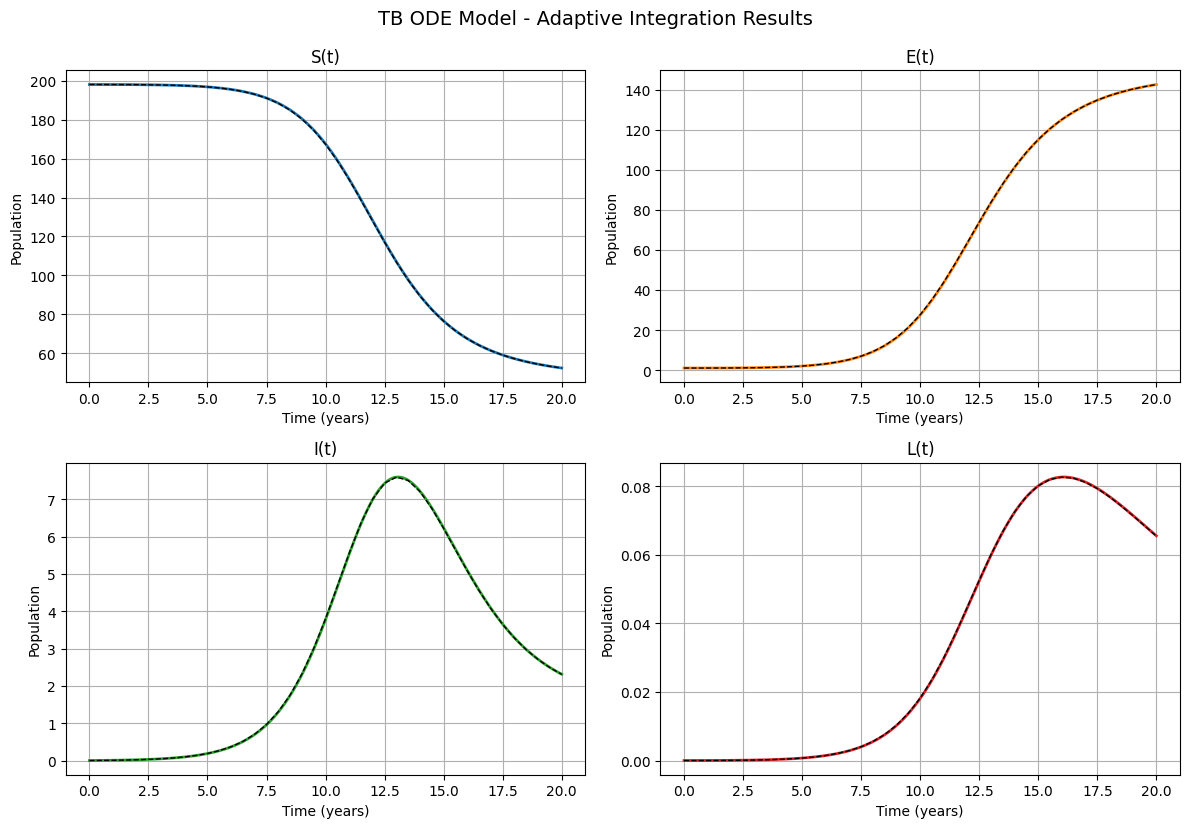

Iterations: 68758
Steps: 68754

Mean Squared Errors (MSE) compared to Reference:
S (Susceptible): 0.016306
E (Exposed)    : 0.015111
I (Infectious) : 0.000112
L (Latent)     : 0.000000
min Time 3.433099999483602e-05
median Time 3.82270000045537e-05
mean Time 0.09439636067999914
std Time 0.6604998105437879


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

current_iter = 0
steps = 0
# Parameters
params = {
    'lambda_': 2,
    'beta': 0.025,
    'delta': 1,
    'p': 0.3,
    'mu': 0.0101,
    'k': 0.005,
    'r1': 0,
    'r2': 0.8182,
    'phi': 0.02,
    'gamma': 0.01,
    'd1': 0.0227,
    'd2': 0.20
}

# ODE system
def f(t, y, p):
    S, E, I, L = y
    dS = p['lambda_'] - p['beta'] * S * (I + p['delta'] * L) - p['mu'] * S
    dE = p['beta'] * (1 - p['p']) * S * (I + p['delta'] * L) + p['r2'] * I - (p['mu'] + p['k'] * (1 - p['r1'])) * E
    dI = p['beta'] * p['p'] * S * (I + p['delta'] * L) + p['k'] * (1 - p['r1']) * E + p['gamma'] * L - \
         (p['mu'] + p['d1'] + p['phi'] * (1 - p['r2']) + p['r2']) * I
    dL = p['phi'] * (1 - p['r2']) * I - (p['mu'] + p['d2'] + p['gamma']) * L
    return np.array([dS, dE, dI, dL])

# Adaptive integration
def adaptive_integrate(f, y0, t0, t_end, params, h0=0.01, tol=1e-3, max_iter = 100000):
    global current_iter, steps
    t = t0
    y = y0.copy()
    h = h0
    t_vals = [t]
    y_vals = [y0.copy()]

    # Dormand-Prince coefficients from table2 here:
    # https://www.sciencedirect.com/science/article/pii/0771050X80900133?via%3Dihub

    c = np.array([0, 1/5, 3/10, 4/5, 8/9, 1, 1], dtype=float) #time increment

    # coefficients for rk5
    b_hat = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0], dtype=float)

    # coefficients fo rk4
    b = np.array([5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40], dtype=float)

    # coeffcients for k_values
    A = np.array([
        [0,            0,            0,            0,           0,            0,     0],
        [1/5,          0,            0,            0,           0,            0,     0],
        [3/40,         9/40,         0,            0,           0,            0,     0],
        [44/45,        -56/15,       32/9,         0,           0,            0,     0],
        [19372/6561,   -25360/6561,  64448/6561,   -212/6561,   0,            0,     0],
        [9017/3168,    -355/33,      46732/5247,   49/176,      -5103/18656,  0,     0],
        [35/384,       0,            500/1113,     125/192,     -2187/6784,   11/84, 0]
    ], dtype=float)

    # Saftey factors for step size control
    safety_factor = 0.9
    max_h_increase = 5.0
    min_h_decrease = 0.2

    k_values = [np.zeros_like(y) for _ in range(len(c))]
    #current_iter = 0
    while t < t_end and current_iter < max_iter:
        current_iter += 1
        # Adjust h to not overshoot t_end
        if t + h > t_end:
            h = t_end - t
            if h < 1e-12: # Avoid tiny steps at the very end
                break

        k_values[0] = f(t, y, params)

        for i in range(1, len(c)):
            sum_terms = np.zeros_like(y)
            for j in range(i):
                sum_terms += A[i, j] * k_values[j]
            k_values[i] = f(t + c[i]*h, y + h * sum_terms, params)

        k_array = np.array(k_values)
        y_rk4 = y + h*np.sum(b[:, np.newaxis] * k_array, axis=0)
        y_rk5 = y + h*np.sum(b_hat[:, np.newaxis] * k_array, axis=0)

        # Estimate local error
        err = np.linalg.norm(y_rk5 - y_rk4, ord=np.inf)

        # Adjust step size
        if err == 0:
            h_new = h * max_h_increase
        else:
            h_new = h * safety_factor * (tol/err)**(1/5)

        h_new = np.clip(h_new, h * min_h_decrease, h * max_h_increase)

        if err <= tol:
            steps += 1
            t += h
            y = y_rk5
            t_vals.append(t)
            y_vals.append(y.copy())
            h = h_new
        else:
            h = h_new
            if h < 1e-15:
              break

    return np.array(t_vals), np.array(y_vals)

# Initial conditions
S0 = params['lambda_'] / params['mu']
y0 = np.array([S0, 1, 0, 0], dtype=float)


t_vals, y_vals = adaptive_integrate(f, y0, 0, 20, params, h0=0.01, tol=1e-7)
df_full = pd.DataFrame({
    'Time': t_vals,
    'S': y_vals[:, 0],
    'E': y_vals[:, 1],
    'I': y_vals[:, 2],
    'L': y_vals[:, 3]
})
# Plot results
labels = ['S(t)', 'E(t)', 'I(t)', 'L(t)']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

df_sol = generate_reference_solution()
time_true = df_sol['Time'].values.astype(np.float32)
S_true = df_sol['S'].values
E_true = df_sol['E'].values
I_true = df_sol['I'].values
L_true = df_sol['L'].values
solutions_true = [S_true, E_true, I_true, L_true]
for i, ax in enumerate(axs.flat):
    ax.plot(t_vals, y_vals[:, i], label=labels[i], color='C'+str(i), linewidth=2)
    ax.plot(time_true, solutions_true[i], color='black', linestyle='--', linewidth=1, label='S - Reference')
    ax.set_title(labels[i])
    ax.set_xlabel("Time (years)")
    ax.set_ylabel("Population")
    ax.grid(True)

plt.tight_layout()
plt.suptitle("TB ODE Model - Adaptive Integration Results", fontsize=14, y=1.03)
plt.show()

print(f"Iterations: {current_iter}")
print(f"Steps: {steps}")

# Calculate Mean Squared Error for each compartment
mse_S, mse_E, mse_I, mse_L = CalculateMSEDifferentTimes(y_vals[:, 0], y_vals[:, 1], y_vals[:, 2], y_vals[:, 3], t_vals)

print("\nMean Squared Errors (MSE) compared to Reference:")
print(f"S (Susceptible): {mse_S:.6f}")
print(f"E (Exposed)    : {mse_E:.6f}")
print(f"I (Infectious) : {mse_I:.6f}")
print(f"L (Latent)     : {mse_L:.6f}")

timesElapsed = timeit.repeat(
    lambda: adaptive_integrate(f, y0, 0, 20, params, h0=0.01, tol=1e-7),
    repeat=50,      # Run 10 separate trials
    number=1        # Each trial runs once (adjust for very fast functions)
)
timesElapsed = sorted(timesElapsed)
print('min Time', min(timesElapsed))
print('median Time', np.median(timesElapsed))
print('mean Time', np.mean(timesElapsed))
print('std Time', np.std(timesElapsed))

# **Deep Learning Part (PINNs)**

1.   List item
2.   List item



In [ ]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from tqdm import tqdm
import torch
import torch.nn as nn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from Table 7.2 in the PDF
Lambda = 2.0       # recruitment rate (year^-1)
beta = 0.025       # transmission coefficient
delta = 1.0        # fraction of loss of sight still infectious
p = 0.3            # proportion of fast progression
mu = 0.0101        # natural death rate
k = 0.005          # rate from exposed to infectious
r1 = 0.0           # rate of effective chemoprophylaxis
r2 = 0.8182        # rate of effective therapy
phi = 0.02         # rate at which infectious become loss of sight
gamma = 0.01       # rate at which loss of sight return to hospital
d1 = 0.0227        # death rate of infectious
d2 = 0.20          # death rate of loss of sight

# Time settings
t0, t_end, N_steps = 0.0, 20.0, 40
ts = np.linspace(t0, t_end, N_steps + 1)
dt = ts[1] - ts[0]
print(ts)
# Gauss-Legendre quadrature (3-point)
n = 3
xg, wg = np.polynomial.legendre.leggauss(n)

# Compartments
S = np.zeros(N_steps + 1)
E = np.zeros(N_steps + 1)
I = np.zeros(N_steps + 1)
L = np.zeros(N_steps + 1)

# Initial conditions (ncase=2 from PDF: endemic case)
S[0] = Lambda / mu  # 2/0.0101 ≈ 198.0
E[0] = 1.0          # Small perturbation in exposed population
I[0] = 0.0
L[0] = 0.0

def derivatives(s, e, i, l):
    """Calculate the derivatives for the TB model"""
    FS = Lambda - beta * s * (i + delta * l) - mu * s
    FE = beta * (1 - p) * s * (i + delta * l) + r2 * i - (mu + k * (1 - r1)) * e
    FI = (beta * p * s * (i + delta * l) + k * (1 - r1) * e + gamma * l -
          (mu + d1 + phi * (1 - r2) + r2) * i)
    FL = phi * (1 - r2) * i - (mu + d2 + gamma) * l
    return FS, FE, FI, FL

# Integration loop using Gauss-Legendre method
for step in range(N_steps):
    t_a, t_b = ts[step], ts[step + 1]
    Sa, Ea, Ia, La = S[step], E[step], I[step], L[step]

    # Calculate derivatives at current point
    dSa, dEa, dIa, dLa = derivatives(Sa, Ea, Ia, La)

    # Predictor step (Euler)
    Sp = Sa + dt * dSa
    Ep = Ea + dt * dEa
    Ip = Ia + dt * dIa
    Lp = La + dt * dLa

    # Evaluate at Gauss points
    FS_vals = np.zeros(n)
    FE_vals = np.zeros(n)
    FI_vals = np.zeros(n)
    FL_vals = np.zeros(n)

    for j in range(n):
        # Time within [t_a, t_b]
        tau_j = 0.5 * (t_b - t_a) * xg[j] + 0.5 * (t_b + t_a)
        # Interpolated state
        theta = (tau_j - t_a) / dt
        sj = Sa * (1 - theta) + Sp * theta
        ej = Ea * (1 - theta) + Ep * theta
        ij = Ia * (1 - theta) + Ip * theta
        lj = La * (1 - theta) + Lp * theta
        # Store derivatives
        FS_vals[j], FE_vals[j], FI_vals[j], FL_vals[j] = derivatives(sj, ej, ij, lj)

    # Update using quadrature
    factor = 0.5 * (t_b - t_a)
    S[step + 1] = Sa + factor * np.dot(wg, FS_vals)
    E[step + 1] = Ea + factor * np.dot(wg, FE_vals)
    I[step + 1] = Ia + factor * np.dot(wg, FI_vals)
    L[step + 1] = La + factor * np.dot(wg, FL_vals)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

axs[0].plot(ts, S, 'b', linewidth=2)
axs[0].set_title("Susceptible Population (S(t))")
axs[0].set_xlabel("Time (years)")
axs[0].set_ylabel("Population")
axs[0].grid(True)

axs[1].plot(ts, E, 'r', linewidth=2)
axs[1].set_title("Exposed Population (E(t))")
axs[1].set_xlabel("Time (years)")
axs[1].set_ylabel("Population")
axs[1].grid(True)

axs[2].plot(ts, I, 'g', linewidth=2)
axs[2].set_title("Infectious Population (I(t))")
axs[2].set_xlabel("Time (years)")
axs[2].set_ylabel("Population")
axs[2].grid(True)

axs[3].plot(ts, L, 'm', linewidth=2)
axs[3].set_title("Out of Sight Population (L(t))")
axs[3].set_xlabel("Time (years)")
axs[3].set_ylabel("Population")
axs[3].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from tqdm import tqdm

import torch
import torch.nn as nn
class NN(nn.Module):
    def __init__(
        self,
        input_size,
        output_size,
        act=torch.nn.Tanh,
    ):
        super(NN, self).__init__()

        layers = [('input', torch.nn.Linear(input_size, 128))]
        layers.append(('input_activation', act()))

        layers.append(('hidden_1', torch.nn.Linear(128, 128)))
        layers.append(('activation_1', act()))

        layers.append(('hidden_2', torch.nn.Linear(128, 128)))
        layers.append(('activation_2', act()))

        layers.append(('finalDense', torch.nn.Linear(128, output_size)))

        layerDict = OrderedDict(layers)
        self.layers = torch.nn.Sequential(layerDict)

    def forward(self, x):
        out = self.layers(x)
        return out

In [ ]:
class Net:
    def __init__(self, initialValues, epochs, trueValues, ts):
        self.device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

        self.model = NN(
            input_size=1,
            output_size=4,
            act=torch.nn.Tanh
        ).to(self.device)

        self.trueValues = torch.transpose(torch.tensor(trueValues, dtype=torch.float32), 0, 1).to(self.device)
        self.ts = torch.tensor(ts, dtype=torch.float32).view(-1, 1).to(self.device)

        self.epochs = epochs
        # A weighting factor for the physics loss vs. the initial condition loss
        self.lambda_physics = 1.0
        self.lambda_initial = 100.0

        self.criterion = torch.nn.MSELoss()
        self.iter = 1

        self.LBFGS = torch.optim.LBFGS(
            self.model.parameters(),
            lr=1.0,
            max_iter=100000,
            max_eval=100000,
            history_size=50,
            tolerance_grad=1e-7,
            tolerance_change=1.0 * np.finfo(float).eps,
            line_search_fn="strong_wolfe",   # better numerical stability
        )

        self.adam = torch.optim.Adam(self.model.parameters(), lr=0.001)
        self.scheduler = torch.optim.lr_scheduler.ExponentialLR(self.adam, gamma=0.99)

        self.h = 0.1
        t = torch.arange(0, 1 + self.h, self.h)

        self.t_physics = torch.linspace(0, 25, 200, dtype=torch.float32, requires_grad=True).view(-1, 1).to(self.device)

        # Define the points for the initial conditions
        self.t_initial = torch.tensor([0.0], requires_grad=True).view(-1, 1).to(self.device)

        self.initialValues = torch.tensor([initialValues], device=self.device, dtype=torch.float32)

        self.RecruitmentRateOfSusceptibleIndividuals = 2
        self.TransmissionCoefficient = 0.025
        self.FractionOfLossOfSightStillInfectious = 1
        self.ProportionOfNewlyInfectedWithFastProgressionToInfectious = 0.3
        self.NaturalDeathRate = 0.0101
        self.RateOfProgressionFromInfectedToInfectious = 0.005
        self.RateOfEffectiveChemoprophylaxis = 0
        self.RateOfEffectiveTherapy = 0.8182
        self.RateAtWhichInfectiousBecomeLossOfSight = 0.02
        self.RateAtWhichLossOfSightReturnToHospital = 0.01
        self.DeathRateOfInfectious = 0.0227
        self.DeathRateOfLossOfSight = 0.2

        self.lossData = 1000

        S0, E0, I0, L0 = initialValues[0], initialValues[1], initialValues[2], initialValues[3]
        S_prime_0 = self.RecruitmentRateOfSusceptibleIndividuals - self.TransmissionCoefficient * S0 * (I0 + self.FractionOfLossOfSightStillInfectious * L0) - self.NaturalDeathRate * S0
        E_prime_0 = self.TransmissionCoefficient * (1-self.ProportionOfNewlyInfectedWithFastProgressionToInfectious) * S0 * (I0 + self.FractionOfLossOfSightStillInfectious * L0) + self.RateOfEffectiveTherapy * I0 - (self.NaturalDeathRate + self.RateOfProgressionFromInfectedToInfectious * (1 - self.RateOfEffectiveChemoprophylaxis)) * E0
        I_prime_0 = self.TransmissionCoefficient * self.ProportionOfNewlyInfectedWithFastProgressionToInfectious * S0 * (I0 + self.FractionOfLossOfSightStillInfectious * L0) + self.RateOfProgressionFromInfectedToInfectious * (1 - self.RateOfEffectiveChemoprophylaxis) * E0 - self.RateAtWhichLossOfSightReturnToHospital * L0 + (self.NaturalDeathRate + self.DeathRateOfInfectious + self.RateAtWhichInfectiousBecomeLossOfSight * (1-self.RateOfEffectiveTherapy) - self.RateOfEffectiveTherapy) * I0
        L_prime_0 = self.RateAtWhichInfectiousBecomeLossOfSight * (1-self.RateOfEffectiveTherapy) * I0 - (self.NaturalDeathRate + self.DeathRateOfLossOfSight + self.RateAtWhichLossOfSightReturnToHospital) * L0
        self.initial_derivatives = torch.tensor([[S_prime_0, E_prime_0, I_prime_0, L_prime_0]], dtype=torch.float32).to(self.device)
        self.loss_history = []

    def Forward(self, t):
      outputs = self.model(t)
      outputs = torch.nn.functional.softplus(outputs)
      S = outputs[:, 0:1]
      E = outputs[:, 1:2]
      I = outputs[:, 2:3]
      L = outputs[:, 3:4]
      Sprime = torch.autograd.grad(S, t, grad_outputs=torch.ones_like(S), create_graph=True)[0]
      Eprime = torch.autograd.grad(E, t, grad_outputs=torch.ones_like(E), create_graph=True)[0]
      Iprime = torch.autograd.grad(I, t, grad_outputs=torch.ones_like(I), create_graph=True)[0]
      Lprime = torch.autograd.grad(L, t, grad_outputs=torch.ones_like(L), create_graph=True)[0]

      residualOfFirstODE = Sprime - self.RecruitmentRateOfSusceptibleIndividuals + self.TransmissionCoefficient * S * (I + self.FractionOfLossOfSightStillInfectious * L) + self.NaturalDeathRate * S
      residualOfSecondODE = Eprime - self.TransmissionCoefficient * (1-self.ProportionOfNewlyInfectedWithFastProgressionToInfectious) * S * (I + self.FractionOfLossOfSightStillInfectious * L) - self.RateOfEffectiveTherapy * I + (self.NaturalDeathRate + self.RateOfProgressionFromInfectedToInfectious * (1 - self.RateOfEffectiveChemoprophylaxis)) * E
      residualOfThirdODE = Iprime - self.TransmissionCoefficient * self.ProportionOfNewlyInfectedWithFastProgressionToInfectious * S * (I + self.FractionOfLossOfSightStillInfectious * L) - self.RateOfProgressionFromInfectedToInfectious * (1 - self.RateOfEffectiveChemoprophylaxis) * E - self.RateAtWhichLossOfSightReturnToHospital * L + (self.NaturalDeathRate + self.DeathRateOfInfectious + self.RateAtWhichInfectiousBecomeLossOfSight * (1-self.RateOfEffectiveTherapy) + self.RateOfEffectiveTherapy) * I
      residualOfFourthODE = Lprime - self.RateAtWhichInfectiousBecomeLossOfSight * (1-self.RateOfEffectiveTherapy) * I + (self.NaturalDeathRate + self.DeathRateOfLossOfSight + self.RateAtWhichLossOfSightReturnToHospital) * L
      return residualOfFirstODE, residualOfSecondODE, residualOfThirdODE, residualOfFourthODE

    def compute_loss(self):
      # Loss from the ODE itself
      residualOfFirstODE, residualOfSecondODE, residualOfThirdODE, residualOfFourthODE = self.Forward(self.t_physics)
      zeros = torch.zeros_like(residualOfFirstODE)
      loss_ode_S = self.criterion(residualOfFirstODE, zeros)
      loss_ode_E = self.criterion(residualOfSecondODE, zeros)
      loss_ode_I = self.criterion(residualOfThirdODE, zeros)
      loss_ode_L = self.criterion(residualOfFourthODE, zeros)

      totalLoss = 0.3 * loss_ode_S + 30 * loss_ode_E + 30 * loss_ode_I + 1000000 * loss_ode_L

      predicted_initial = torch.nn.functional.softplus(self.model(self.t_initial))
      lossFromInitialCondition = self.criterion(predicted_initial, self.initialValues)

      # --- NEW: Compute the loss for initial derivatives ---
      S_0_pred, E_0_pred, I_0_pred, L_0_pred = predicted_initial[:,0:1], predicted_initial[:,1:2], predicted_initial[:,2:3], predicted_initial[:,3:4]
      S_prime_0_pred = torch.autograd.grad(S_0_pred, self.t_initial, torch.ones_like(S_0_pred), create_graph=True)[0]
      E_prime_0_pred = torch.autograd.grad(E_0_pred, self.t_initial, torch.ones_like(E_0_pred), create_graph=True)[0]
      I_prime_0_pred = torch.autograd.grad(I_0_pred, self.t_initial, torch.ones_like(I_0_pred), create_graph=True)[0]
      L_prime_0_pred = torch.autograd.grad(L_0_pred, self.t_initial, torch.ones_like(L_0_pred), create_graph=True)[0]
      predicted_derivatives = torch.cat([S_prime_0_pred, E_prime_0_pred, I_prime_0_pred, L_prime_0_pred], dim=1)
      loss_ic_deriv = self.criterion(predicted_derivatives, self.initial_derivatives)

      predicted_data = torch.nn.functional.softplus(self.model(self.ts))
      loss_data = self.criterion(predicted_data, self.trueValues)


      # Total loss
      total_loss = self.lambda_physics * totalLoss + self.lambda_initial * lossFromInitialCondition + loss_ic_deriv * 1000 + loss_data * self.lossData
      return total_loss

    def Train(self):
      for i in range(self.epochs):
        if i < 1000:
            self.lambda_physics = 1
        elif i < 3000:
            self.lambda_physics = 10
        else:
            self.lambda_physics = 100.0
        if i >= 7000 and i < 12000:
          self.lossData = 100
        elif i >= 12000 and i < 20000:
          self.lossData = 10
        elif i > 20000:
          self.lossData = 1
        self.adam.zero_grad()
        totalLoss =  self.compute_loss()
        totalLoss.backward()
        self.adam.step()
        self.loss_history.append(totalLoss.item())
        if (i + 1) % 1000 == 0: # Decay every 1000 steps
            self.scheduler.step()
            print(f"Adam Epoch [{i+1}/{self.epochs}], Loss: {totalLoss.item():.8f}, LR: {self.scheduler.get_last_lr()[0]:.6f}")
      def closure():
        self.LBFGS.zero_grad()
        totalLoss = self.compute_loss()
        self.loss_history.append(totalLoss.item())

        totalLoss.backward()
        return totalLoss

      self.LBFGS.step(closure)
      final_loss = self.compute_loss()
      print(f"\nTraining finished. Final Loss: {final_loss.item():.6f}")

    def PredictSingle(self, t):
      self.model.eval()
      inputTensor = torch.tensor([[t]], device=self.device, dtype=torch.float32)
      output = self.model(inputTensor)
      output = torch.nn.functional.softplus(output)
      return output.detach().cpu().numpy().flatten()

    def PredictArray(self, t):
      self.model.eval()
      inputTensor = torch.tensor([t], device=self.device, dtype=torch.float32).view(-1, 1)
      output = self.model(inputTensor)
      output = torch.nn.functional.softplus(output)
      return output.squeeze().detach().cpu().numpy()

In [ ]:
trueInputs = np.array([S, E, I, L])
Model = Net([198.01980198, 1, 0, 0], 30000, trueInputs, ts)
Model.Train()


ncase = 2 beta = 0.025

 t         S         E         I         L
min Time 0.003157790999921417
median Time 0.006026785499955167
mean Time 0.005720488087996728
std Time 0.0029778685509355375
 0.00        198.0         1.00      0.00000      0.00000
 0.50        198.0         1.00      0.00293      0.00000
 1.00        198.0         1.00      0.00695      0.00001
 1.50        198.0         1.01      0.01249      0.00003
 2.00        197.9         1.04      0.02015      0.00005
 2.50        197.9         1.08      0.03078      0.00009
 3.00        197.8         1.16      0.04553      0.00015
 3.50        197.7         1.27      0.06604      0.00023
 4.00        197.5         1.43      0.09452      0.00034
 4.50        197.2         1.66      0.13406      0.00050
 5.00        196.8         1.99      0.18884      0.00072
 5.50        196.2         2.45      0.26456      0.00104
 6.00        195.5         3.10      0.36879      0.00147
 6.50        194.4         4.00      0.51146      0.0

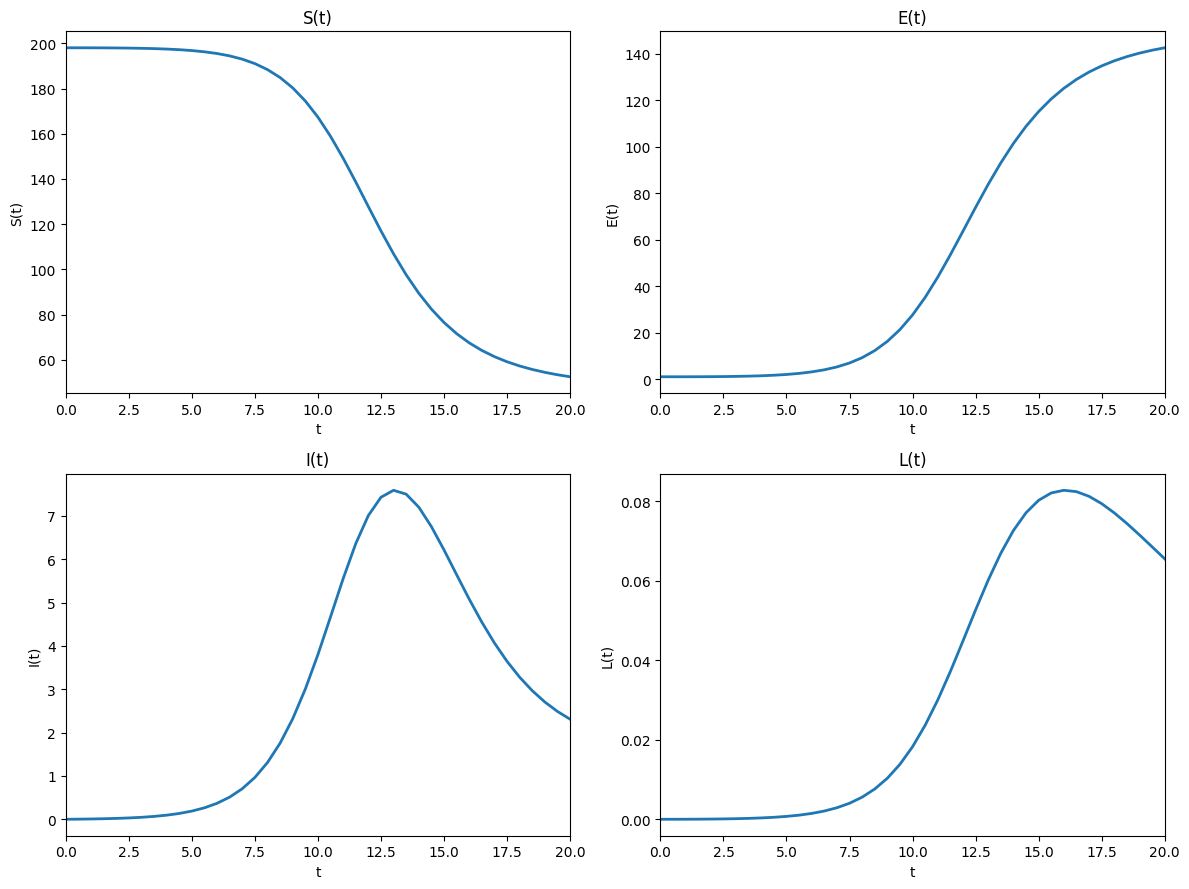

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Define the ODE system
def tb_1(t, y, parms):
    """
    System of ODEs for modeling population dynamics.
    Parameters:
        t: Time (not explicitly used here).
        y: State variables [S, E, I, L].
        parms: Dictionary containing model parameters.
    Returns:
        Derivatives of state variables [dS/dt, dE/dt, dI/dt, dL/dt].
    """
    S, E, I, L = y
    lambda_, beta, delta, mu, p, r1, r2, k, gamma, phi, d1, d2 = (
        parms['lambda'], parms['beta'], parms['delta'], parms['mu'],
        parms['p'], parms['r1'], parms['r2'], parms['k'],
        parms['gamma'], parms['phi'], parms['d1'], parms['d2']
    )

    St = lambda_ - beta * S * (I + delta * L) - mu * S
    Et = beta * (1 - p) * S * (I + delta * L) + r2 * I - (mu + k * (1 - r1)) * E
    It = (beta * p * S * (I + delta * L) +
          k * (1 - r1) * E + gamma * L -
          (mu + d1 + phi * (1 - r2) + r2) * I)
    Lt = phi * (1 - r2) * I - (mu + d2 + gamma) * L

    return [St, Et, It, Lt]


# Main script
if __name__ == "__main__":
    # Select case
    ncase = 2  # 1 for equilibrium, no disease; 2 for endemic

    # Parameters
    params = {
        'lambda': 2, 'beta': 0.025, 'delta': 1, 'p': 0.3, 'mu': 0.0101,
        'k': 0.005, 'r1': 0, 'r2': 0.8182, 'phi': 0.02, 'gamma': 0.01,
        'd1': 0.022722, 'd2': 0.20
    }

    # Initial conditions
    if ncase == 1:
        y0 = [params['lambda'] / params['mu'], 0, 0, 0]  # Equilibrium, no disease
    elif ncase == 2:
        y0 = [params['lambda'] / params['mu'], 1, 0, 0]  # Endemic case

    # Time settings
    tf = 20  # Final time
    nout = 41  # Number of output points
    tm = np.linspace(0, tf, nout)  # Time vector

    # Print heading
    print(f"\nncase = {ncase} beta = {params['beta']:.3f}\n")
    print(" t         S         E         I         L")

    # Solve ODEs
    sol = solve_ivp(tb_1, t_span=(0, tf), y0=y0, t_eval=tm, args=(params,), method='LSODA', atol=1e-8, rtol=1e-8)
    timesElapsed = timeit.repeat(
    lambda: solve_ivp(tb_1, t_span=(0, tf), y0=y0, t_eval=tm, args=(params,), method='LSODA', atol=1e-8, rtol=1e-8),
    repeat=1000,      # Run 10 separate trials
    number=1        # Each trial runs once (adjust for very fast functions)
    )
    timesElapsed = sorted(timesElapsed)
    print('min Time', min(timesElapsed))
    print('median Time', np.median(timesElapsed))
    print('mean Time', np.mean(timesElapsed))
    print('std Time', np.std(timesElapsed))
    # Extract results
    yn = sol.y.T  # Transpose to match shape (nout x 4)

    # Print numerical output
    for i in range(nout):
        print(f"{tm[i]:5.2f} {yn[i, 0]:12.1f} {yn[i, 1]:12.2f} {yn[i, 2]:12.5f} {yn[i, 3]:12.5f}")

    # Plot results
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 2, 1)
    plt.plot(tm, yn[:, 0], lw=2)
    plt.title("S(t)")
    plt.xlabel("t")
    plt.ylabel("S(t)")
    plt.xlim(0, 20)

    plt.subplot(2, 2, 2)
    plt.plot(tm, yn[:, 1], lw=2)
    plt.title("E(t)")
    plt.xlabel("t")
    plt.ylabel("E(t)")
    plt.xlim(0, 20)

    plt.subplot(2, 2, 3)
    plt.plot(tm, yn[:, 2], lw=2)
    plt.title("I(t)")
    plt.xlabel("t")
    plt.ylabel("I(t)")
    plt.xlim(0, 20)

    plt.subplot(2, 2, 4)
    plt.plot(tm, yn[:, 3], lw=2)
    plt.title("L(t)")
    plt.xlabel("t")
    plt.ylabel("L(t)")
    plt.xlim(0, 20)

    plt.tight_layout()
    plt.show()

In [ ]:
Model = torch.load("model (1).pth", weights_only=False)

In [ ]:
inputs = np.arange(0, 20, 0.5, dtype=np.float32)
timesElapsed = timeit.repeat(
    lambda: Model.PredictArray(inputs),
    repeat=1000,      # Run 10 separate trials
    number=1        # Each trial runs once (adjust for very fast functions)
)
timesElapsed = sorted(timesElapsed)
print('min Time', min(timesElapsed))
print('median Time', np.median(timesElapsed))
print('mean Time', np.mean(timesElapsed))
print('std Time', np.std(timesElapsed))

/tmp/ipython-input-2-2922847881.py:161: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  inputTensor = torch.tensor([t], device=self.device, dtype=torch.float32).view(-1, 1)


min Time 0.0003630610000016077
median Time 0.00038814099998774054
mean Time 0.0006281523079996702
std Time 0.0069425180955209305


/tmp/ipython-input-9-2922847881.py:161: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  inputTensor = torch.tensor([t], device=self.device, dtype=torch.float32).view(-1, 1)


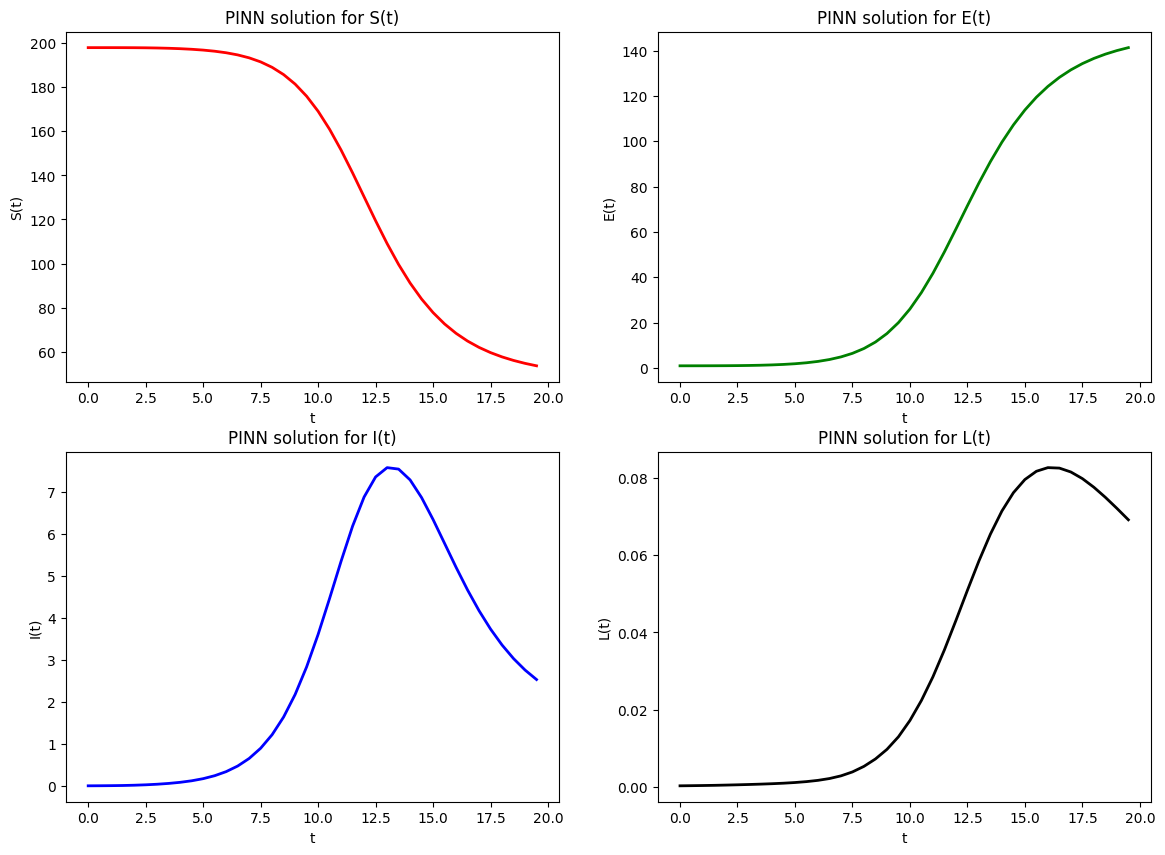

In [ ]:
inputs = np.arange(0, 20, 0.5, dtype=np.float32)
outputs = Model.PredictArray(inputs)
S = [output[0] for output in outputs]
E = [output[1] for output in outputs]
I = [output[2] for output in outputs]
L = [output[3] for output in outputs]
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(inputs, S, label="PINN Solution", linewidth=2, color='red', linestyle='-')
plt.xlabel("t")
plt.ylabel("S(t)")
plt.title("PINN solution for S(t)")

plt.subplot(2, 2, 2)
plt.plot(inputs, E, label="PINN Solution", linewidth=2, color='green', linestyle='-')
plt.xlabel("t")
plt.ylabel("E(t)")
plt.title("PINN solution for E(t)")

plt.subplot(2, 2, 3)
plt.plot(inputs, I, label="PINN Solution", linewidth=2, color='blue', linestyle='-')
plt.xlabel("t")
plt.ylabel("I(t)")
plt.title("PINN solution for I(t)")

plt.subplot(2, 2, 4)
plt.plot(inputs, L, label="PINN Solution", linewidth=2, color='black', linestyle='-')
plt.xlabel("t")
plt.ylabel("L(t)")
plt.title("PINN solution for L(t)")


plt.show()

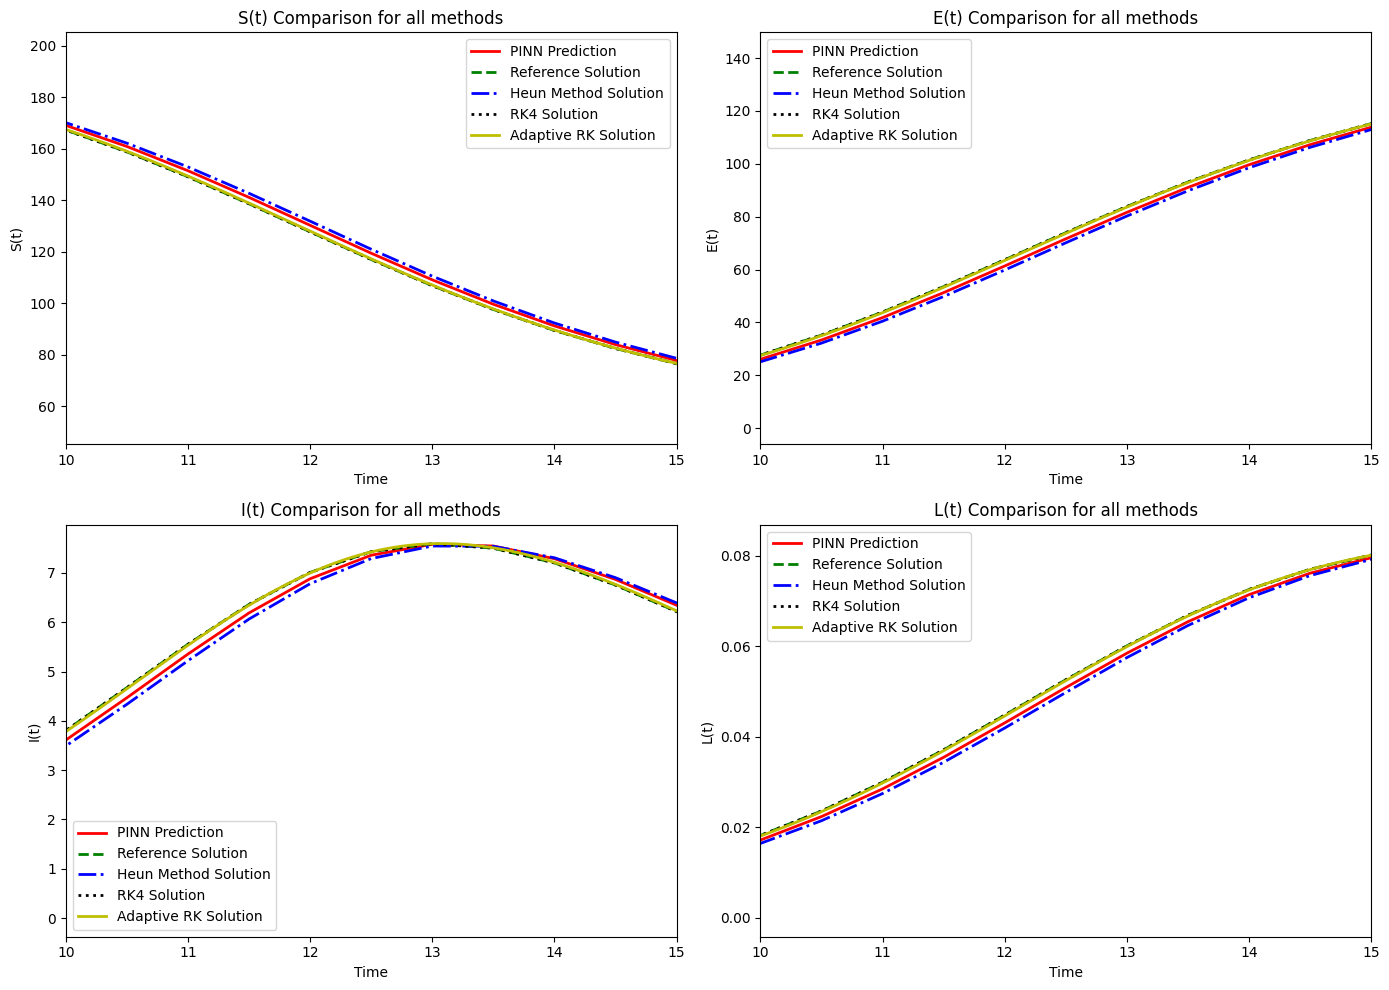

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the reference values from the Excel sheet
df = generate_reference_solution()

# Reference data
time_true = df['Time'].values.astype(np.float32)
S_true = df['S'].values
E_true = df['E'].values
I_true = df['I'].values
L_true = df['L'].values

# Time points for PINN predictions
inputs = np.arange(0, 20.01, 0.5, dtype=np.float32)


outputs = Model.PredictArray(inputs)

# This should return a list/array of shape [len(inputs), 4]
outputs = Model.PredictArray(inputs)

# Extract PINN predictions
S_pred = [output[0] for output in outputs]
E_pred = [output[1] for output in outputs]
I_pred = [output[2] for output in outputs]
L_pred = [output[3] for output in outputs]

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(inputs, S_pred, 'r-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, S_true, 'g--', linewidth=2, label='Reference Solution')
plt.plot(time_true, S_heun, 'b-.', linewidth=2, label='Heun Method Solution')
plt.plot(time_true, S_rk, 'k:', linewidth=2, label='RK4 Solution')
plt.plot(df_full["Time"], df_full["S"], 'y-', linewidth=2, label='Adaptive RK Solution')
plt.title('S(t) Comparison for all methods')
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.legend()
plt.xlim((10, 15))

plt.subplot(2, 2, 2)
plt.plot(inputs, E_pred, 'r-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, E_true, 'g--', linewidth=2, label='Reference Solution')
plt.plot(time_true, E_heun, 'b-.', linewidth=2, label='Heun Method Solution')
plt.plot(time_true, E_rk, 'k:', linewidth=2, label='RK4 Solution')
plt.plot(df_full["Time"], df_full["E"], 'y-', linewidth=2, label='Adaptive RK Solution')
plt.title('E(t) Comparison for all methods')
plt.xlabel('Time')
plt.ylabel('E(t)')
plt.legend()
plt.xlim((10, 15))

plt.subplot(2, 2, 3)
plt.plot(inputs, I_pred, 'r-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, I_true, 'g--', linewidth=2, label='Reference Solution')
plt.plot(time_true, I_heun, 'b-.', linewidth=2, label='Heun Method Solution')
plt.plot(time_true, I_rk, 'k:', linewidth=2, label='RK4 Solution')
plt.plot(df_full["Time"], df_full["I"], 'y-', linewidth=2, label='Adaptive RK Solution')
plt.title('I(t) Comparison for all methods')
plt.xlabel('Time')
plt.ylabel('I(t)')
plt.legend()
plt.xlim((10, 15))

plt.subplot(2, 2, 4)
plt.plot(inputs, L_pred, 'r-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, L_true, 'g--', linewidth=2, label='Reference Solution')
plt.plot(time_true, L_heun, 'b-.', linewidth=2, label='Heun Method Solution')
plt.plot(time_true, L_rk, 'k:', linewidth=2, label='RK4 Solution')
plt.plot(df_full["Time"], df_full["L"], 'y-', linewidth=2, label='Adaptive RK Solution')
plt.title('L(t) Comparison for all methods')
plt.xlabel('Time')
plt.ylabel('L(t)')
plt.legend()

plt.xlim((10, 15))
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Compute MSE for each compartment
mse_S = mean_squared_error(S_true, S_pred)
mse_E = mean_squared_error(E_true, E_pred)
mse_I = mean_squared_error(I_true, I_pred)
mse_L = mean_squared_error(L_true, L_pred)

# Print MSE values
print(f"MSE for S(t): {mse_S:.6f}")
print(f"MSE for E(t): {mse_E:.6f}")
print(f"MSE for I(t): {mse_I:.6f}")
print(f"MSE for L(t): {mse_L:.6f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare epoch values and losses
epochs = np.arange(1, len(Model.loss_history) + 1)
losses = Model.loss_history

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, losses, color='purple', linewidth=2)

# Define tick positions every 1000 epochs
tick_positions = np.arange(1000, len(epochs) + 1, 1000)
tick_labels = np.arange(1, len(tick_positions) + 1)  # Labels: 1, 2, 3, ...

# Set those on the x-axis
plt.xticks(tick_positions, tick_labels)

# Axis titles
plt.title("Total Loss During Training", fontsize=16)
plt.xlabel("Epoch (×1000)", fontsize=14)
plt.ylabel("Total Loss", fontsize=14)

# Grid and layout
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Parameters from Table 7.2 in the PDF
Lambda = 2.0       # recruitment rate (year^-1)
beta = 0.025       # transmission coefficient
delta = 1.0        # fraction of loss of sight still infectious
p = 0.3            # proportion of fast progression
mu = 0.0101        # natural death rate
k = 0.005          # rate from exposed to infectious
r1 = 0.0           # rate of effective chemoprophylaxis
r2 = 0.8182        # rate of effective therapy
phi = 0.02         # rate at which infectious become loss of sight
gamma = 0.01       # rate at which loss of sight return to hospital
d1 = 0.0227        # death rate of infectious
d2 = 0.20          # death rate of loss of sight

# Time settings
t0, t_end, N_steps = 0.0, 100.0, 200
ts = np.linspace(t0, t_end, N_steps + 1)
dt = ts[1] - ts[0]
print(ts)
# Gauss-Legendre quadrature (3-point)
n = 3
xg, wg = np.polynomial.legendre.leggauss(n)

# Compartments
S = np.zeros(N_steps + 1)
E = np.zeros(N_steps + 1)
I = np.zeros(N_steps + 1)
L = np.zeros(N_steps + 1)

# Initial conditions (ncase=2 from PDF: endemic case)
S[0] = Lambda / mu  # 2/0.0101 ≈ 198.0
E[0] = 1.0          # Small perturbation in exposed population
I[0] = 0.0
L[0] = 0.0

def derivatives(s, e, i, l):
    """Calculate the derivatives for the TB model"""
    FS = Lambda - beta * s * (i + delta * l) - mu * s
    FE = beta * (1 - p) * s * (i + delta * l) + r2 * i - (mu + k * (1 - r1)) * e
    FI = (beta * p * s * (i + delta * l) + k * (1 - r1) * e + gamma * l -
          (mu + d1 + phi * (1 - r2) + r2) * i)
    FL = phi * (1 - r2) * i - (mu + d2 + gamma) * l
    return FS, FE, FI, FL

# Integration loop using Gauss-Legendre method
for step in range(N_steps):
    t_a, t_b = ts[step], ts[step + 1]
    Sa, Ea, Ia, La = S[step], E[step], I[step], L[step]

    # Calculate derivatives at current point
    dSa, dEa, dIa, dLa = derivatives(Sa, Ea, Ia, La)

    # Predictor step (Euler)
    Sp = Sa + dt * dSa
    Ep = Ea + dt * dEa
    Ip = Ia + dt * dIa
    Lp = La + dt * dLa

    # Evaluate at Gauss points
    FS_vals = np.zeros(n)
    FE_vals = np.zeros(n)
    FI_vals = np.zeros(n)
    FL_vals = np.zeros(n)

    for j in range(n):
        # Time within [t_a, t_b]
        tau_j = 0.5 * (t_b - t_a) * xg[j] + 0.5 * (t_b + t_a)
        # Interpolated state
        theta = (tau_j - t_a) / dt
        sj = Sa * (1 - theta) + Sp * theta
        ej = Ea * (1 - theta) + Ep * theta
        ij = Ia * (1 - theta) + Ip * theta
        lj = La * (1 - theta) + Lp * theta
        # Store derivatives
        FS_vals[j], FE_vals[j], FI_vals[j], FL_vals[j] = derivatives(sj, ej, ij, lj)

    # Update using quadrature
    factor = 0.5 * (t_b - t_a)
    S[step + 1] = Sa + factor * np.dot(wg, FS_vals)
    E[step + 1] = Ea + factor * np.dot(wg, FE_vals)
    I[step + 1] = Ia + factor * np.dot(wg, FI_vals)
    L[step + 1] = La + factor * np.dot(wg, FL_vals)


In [ ]:
# Reference data
time_true = ts
S_true = S
E_true = E
I_true = I
L_true = L

outputs = Model.PredictArray(ts)

# This should return a list/array of shape [len(inputs), 4]
outputs = Model.PredictArray(ts)

# Extract PINN predictions
S_pred = [output[0] for output in outputs]
E_pred = [output[1] for output in outputs]
I_pred = [output[2] for output in outputs]
L_pred = [output[3] for output in outputs]

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(time_true, S_pred, 'r-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, S_true, 'k--', linewidth=2, label='Numerical Solution')
plt.title('S(t) Comparison')
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time_true, E_pred, 'g-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, E_true, 'k--', linewidth=2, label='Numerical Solution')
plt.title('E(t) Comparison')
plt.xlabel('Time')
plt.ylabel('E(t)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time_true, I_pred, 'b-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, I_true, 'k--', linewidth=2, label='Numerical Solution')
plt.title('I(t) Comparison')
plt.xlabel('Time')
plt.ylabel('I(t)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time_true, L_pred, 'k-', linewidth=2, label='PINN Prediction')
plt.plot(time_true, L_true, 'k--', linewidth=2, label='Numerical Solution')
plt.title('L(t) Comparison')
plt.xlabel('Time')
plt.ylabel('L(t)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Compute MSE for each compartment
mse_S = mean_squared_error(S_true, S_pred)
mse_E = mean_squared_error(E_true, E_pred)
mse_I = mean_squared_error(I_true, I_pred)
mse_L = mean_squared_error(L_true, L_pred)

# Print MSE values
print(f"MSE for S(t): {mse_S:.6f}")
print(f"MSE for E(t): {mse_E:.6f}")
print(f"MSE for I(t): {mse_I:.6f}")
print(f"MSE for L(t): {mse_L:.6f}")

In [ ]:
torch.save(Model, "model.pth")


input : time
Output: 4 values (S, E, I, L), scaled to expected ranges

Uses softplus() to ensure outputs stay positive


L is much smaller than other variables, so:
Smaller scaling factor,Gentler softplus activation,Larger weight in the loss function
This improves numerical stability and precision for L

 Loss Function (compute_loss)
Three parts:

A. Physics Loss
The derivatives of the neural network outputs are matched to the ODE system using autograd.

This enforces that the neural network respects the ODEs.

 B. Initial Condition Loss
Forces the PINN output at
t=0 to match the known initial values.

 C. Data Loss
Compares the PINN prediction to a small number of reference data points from solve_ivp for better convergence.

Special care is given to the L compartment, which is:
Small in magnitude
Harder to learn
Given much more weight in the loss

5. Training Strategy
Two-phase training:

Adam optimizer (fast, robust) – 8000 epochs

LBFGS optimizer (fine-tuning) – 100 steps

Xavier initialization sets the weights of the network layers to values that are drawn from a uniform distribution. The range of this distribution is determined by the number of input and output neurons in the layer.
This method helps in maintaining the variance of the activations across layers, which is crucial for stable training.
Gain Factor: A gain of 0.3 is used, which scales the weights to be smaller, potentially leading to more stable training.
it helps perevents the gradient from vanishing or exploding


Components of Loss:

ODE Loss: Similar to physics loss, it measures how well the model satisfies the ODEs.
Initial Condition Loss: Ensures predictions match initial conditions.
Initial Derivatives Loss: Ensures the predicted initial derivatives match the calculated initial derivatives.
Data Loss: Compares predictions to provided reference data


 Training strategy
Two-Phase Optimization:
Phase 1 - Adam Optimization:
Uses the Adam optimizer for 8000 epochs.
Adaptive weighting is applied, with higher weights for initial conditions and data loss in early epochs.
Phase 2 - LBFGS Fine-Tuning:
Uses the LBFGS optimizer for 100 epochs.
Focuses on fine-tuning the model to further reduce the loss.
